In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:
df_tr = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\Data machine hack\Data\train.csv")
df_tr[0:2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [3]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df_tr.duplicated().sum()

529

In [5]:
df_tr.drop_duplicates(inplace = True)
df_tr.reset_index(drop = True, inplace = True)

In [6]:
df_tr.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [7]:
df_tr['location'].fillna('Unknown', inplace = True)

In [8]:
df_tr['size'].fillna('0', inplace = True)

In [9]:
df_tr['society'].fillna('Unknown', inplace = True)

In [10]:
df_tr['bath'].fillna(0.0, inplace = True)

In [11]:
df_tr['balcony'].fillna(0.0, inplace = True)

In [12]:
df_tr['total_sqft'].value_counts()

1200           808
1100           210
1500           202
2400           196
600            178
              ... 
3103 - 3890      1
3692             1
3067 - 8156      1
2497             1
987              1
Name: total_sqft, Length: 2117, dtype: int64

In [13]:
def fn(x):
    for i in x:
        x.split()
    return int(x.split()[0])

In [14]:
df_tr['BHK'] = df_tr['size'].astype('str').apply(fn)

In [15]:
def fn2(x):
    y = x.split('-')
    if len(y) == 2:
        y1 = (float(y[0])+ float(y[1]))/2
        return y1
    try:
        return float(x)
    except:
        return None

In [16]:
df_tr['Sqft'] = df_tr['total_sqft'].apply(fn2)

In [17]:
df_tr.isna().sum()

area_type        0
availability     0
location         0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
BHK              0
Sqft            46
dtype: int64

In [18]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  object 
 4   society       12791 non-null  object 
 5   total_sqft    12791 non-null  object 
 6   bath          12791 non-null  float64
 7   balcony       12791 non-null  float64
 8   price         12791 non-null  float64
 9   BHK           12791 non-null  int64  
 10  Sqft          12745 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In [19]:
df_tr1 = df_tr.copy() 

In [20]:
df_tr.drop(columns = ['area_type', 'availability', 'size'], inplace = True)

In [21]:
df_tr[df_tr['Sqft'].isna()]

,location,society,total_sqft,bath,balcony,price,BHK,Sqft
410,Kengeri,Unknown,34.46Sq. Meter,1.0,0.0,18.50,1,NaN
648,Arekere,Unknown,4125Perch,9.0,0.0,265.00,9,NaN
775,Basavanagara,Unknown,1000Sq. Meter,2.0,1.0,93.00,1,NaN
872,Singapura Village,Unknown,1100Sq. Yards,2.0,0.0,45.00,2,NaN
1018,Marathi Layout,Unknown,5.31Acres,1.0,0.0,110.00,1,NaN
1085,Narasapura,Unknown,30Acres,2.0,2.0,29.50,2,NaN
1395,Chamrajpet,Unknown,716Sq. Meter,9.0,1.0,296.00,9,NaN
1704,Singena Agrahara,CoiewSy,1500Sq. Meter,3.0,1.0,95.00,3,NaN
1735,Hosa Road,Sosisic,142.61Sq. Meter,3.0,1.0,115.00,3,NaN
1812,Sarjapur,Inensba,1574Sq. Yards,3.0,1.0,76.00,3,NaN


In [22]:
df_tr.drop(columns = ['total_sqft'], inplace = True)

In [23]:
df_tr.dropna(inplace = True)

In [24]:
df_tr.reset_index(drop = True, inplace = True)

In [25]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  12745 non-null  object 
 1   society   12745 non-null  object 
 2   bath      12745 non-null  float64
 3   balcony   12745 non-null  float64
 4   price     12745 non-null  float64
 5   BHK       12745 non-null  int64  
 6   Sqft      12745 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 697.1+ KB


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


location
 Anekal                 AxesSubplot(0.125,0.125;0.775x0.755)
 Banaswadi              AxesSubplot(0.125,0.125;0.775x0.755)
 Basavangudi            AxesSubplot(0.125,0.125;0.775x0.755)
 Bhoganhalli            AxesSubplot(0.125,0.125;0.775x0.755)
 Devarabeesana Halli    AxesSubplot(0.125,0.125;0.775x0.755)
                                        ...                 
t.c palya               AxesSubplot(0.125,0.125;0.775x0.755)
tc.palya                AxesSubplot(0.125,0.125;0.775x0.755)
vinayakanagar           AxesSubplot(0.125,0.125;0.775x0.755)
white field,kadugodi    AxesSubplot(0.125,0.125;0.775x0.755)
whitefiled              AxesSubplot(0.125,0.125;0.775x0.755)
Length: 1300, dtype: object

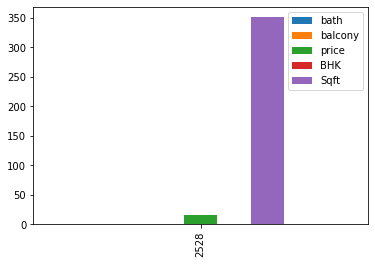

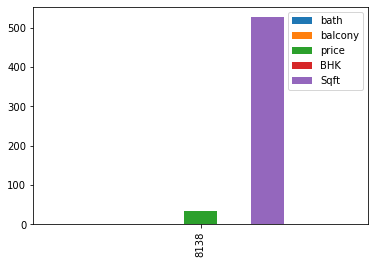

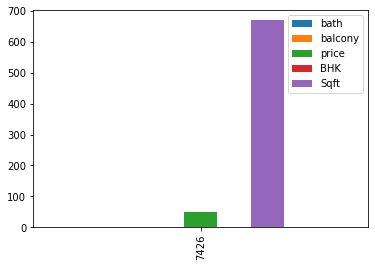

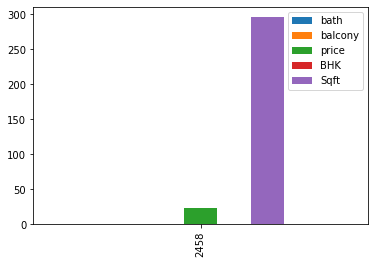

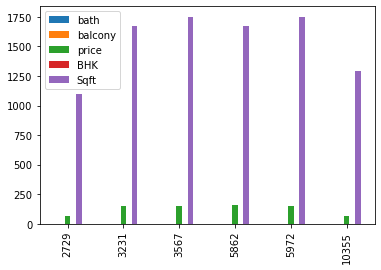

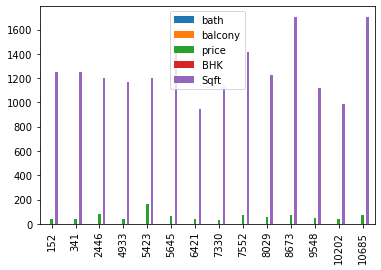

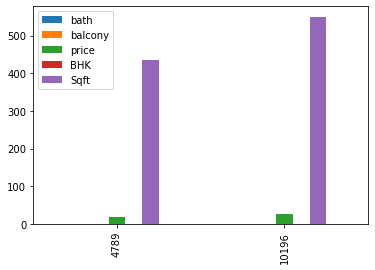

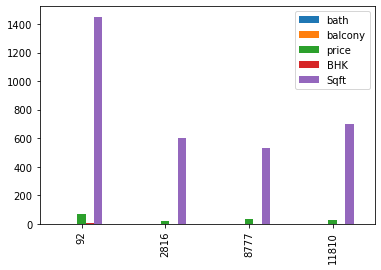

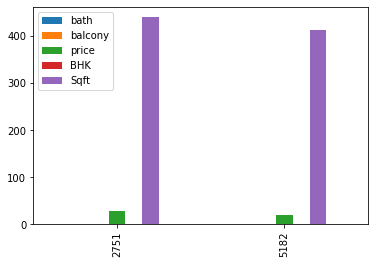

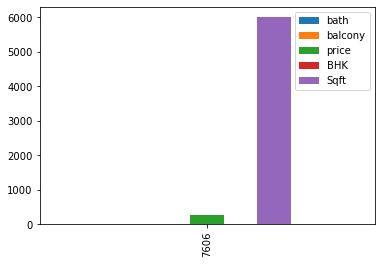

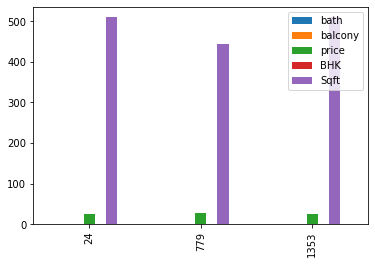

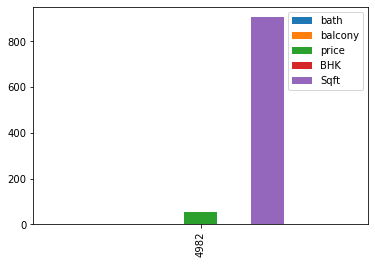

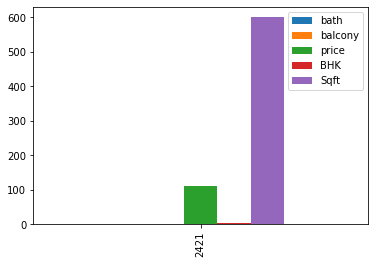

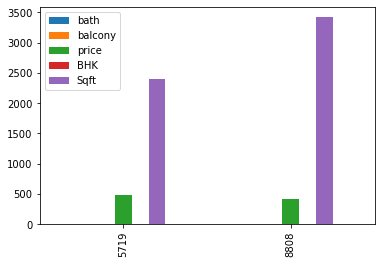

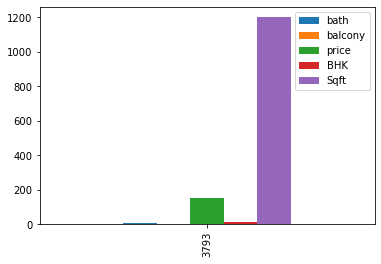

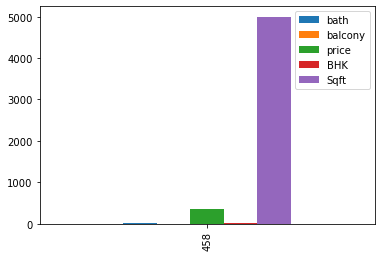

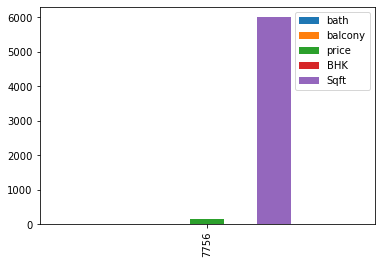

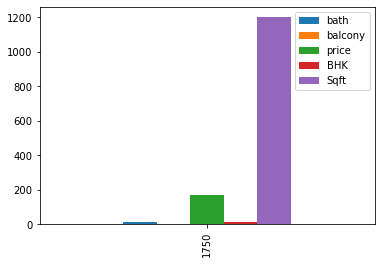

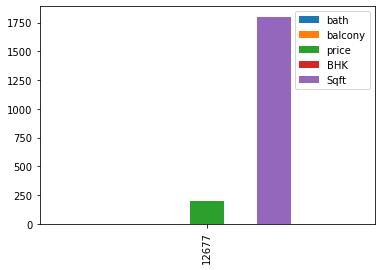

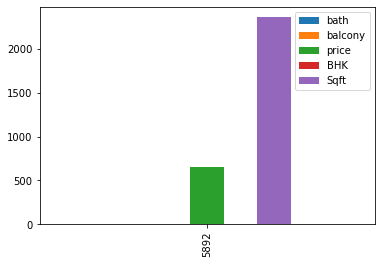

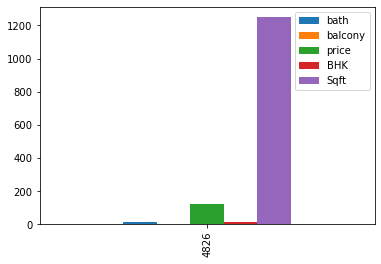

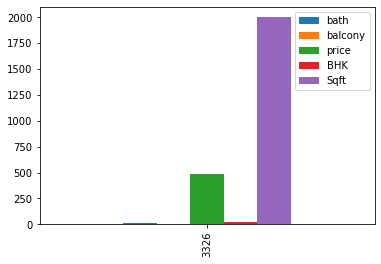

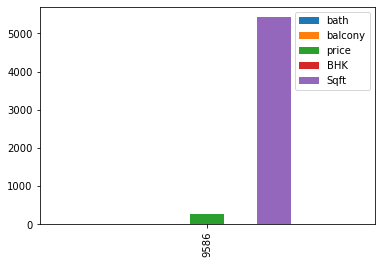

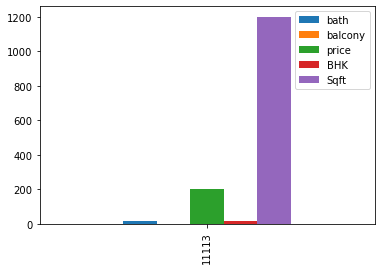

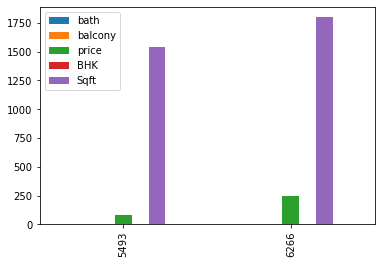

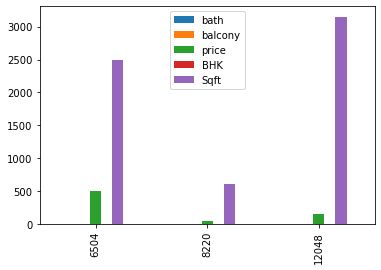

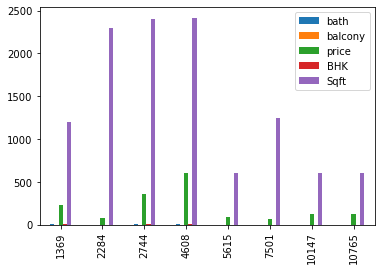

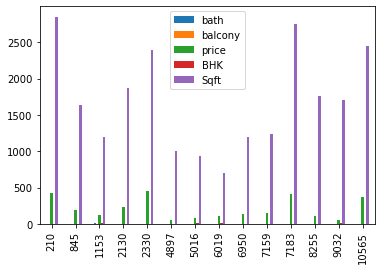

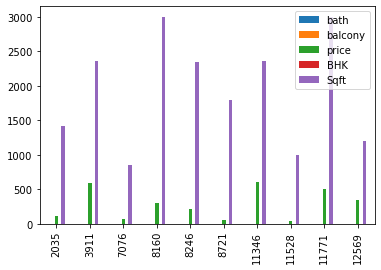

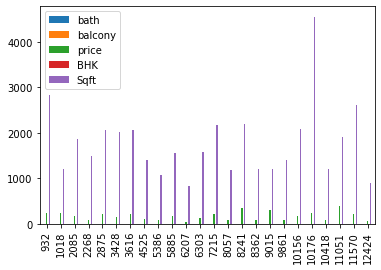

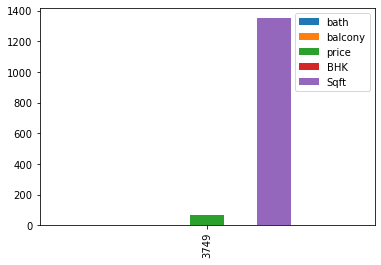

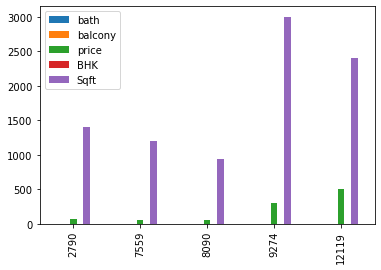

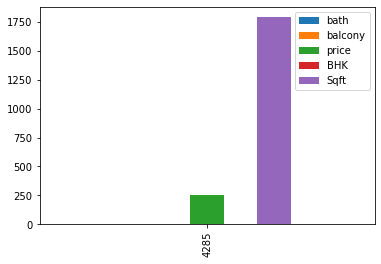

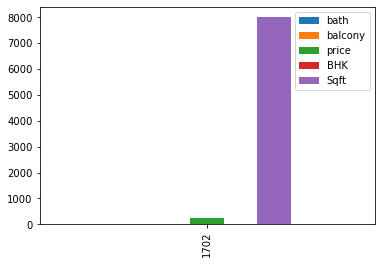

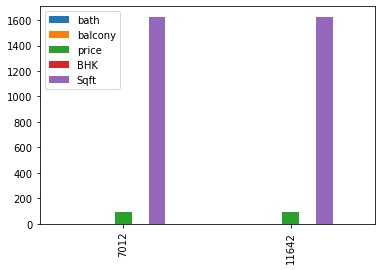

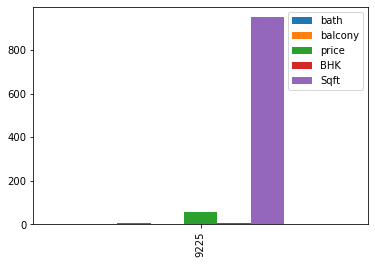

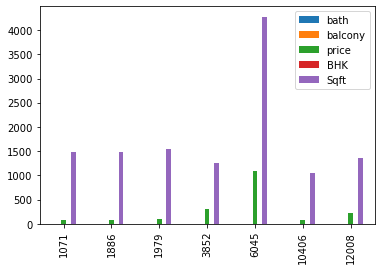

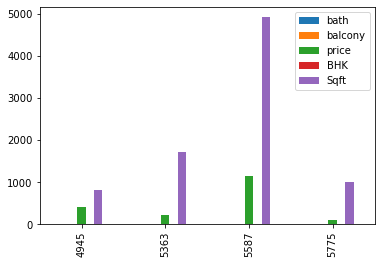

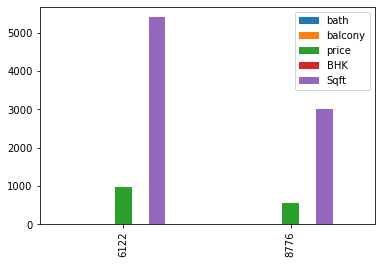

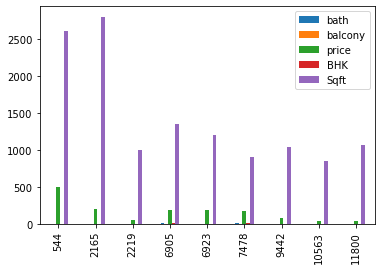

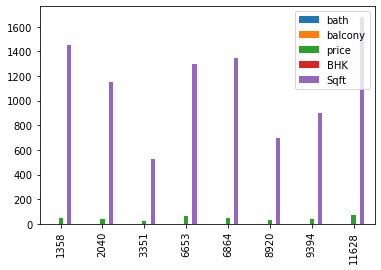

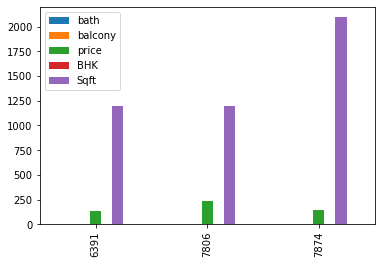

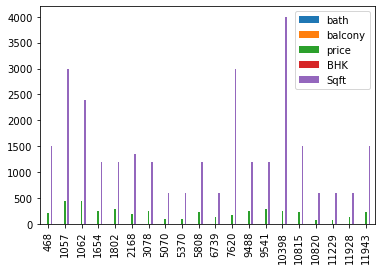

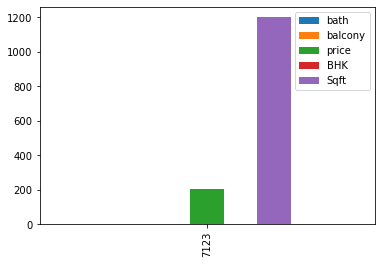

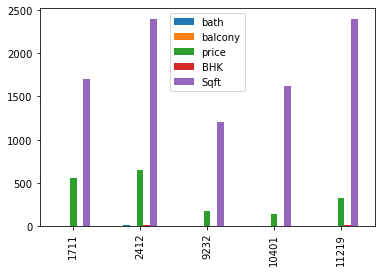

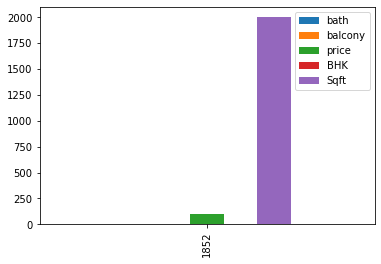

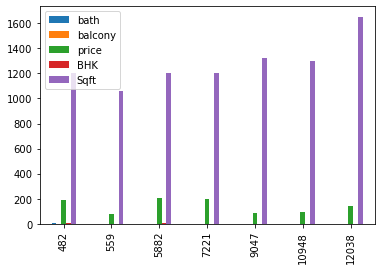

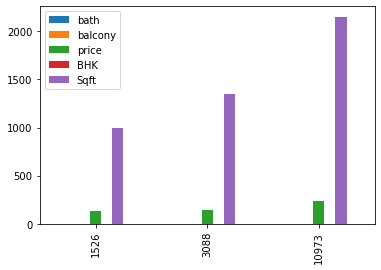

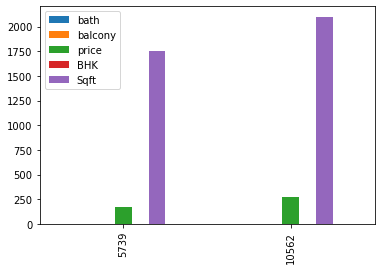

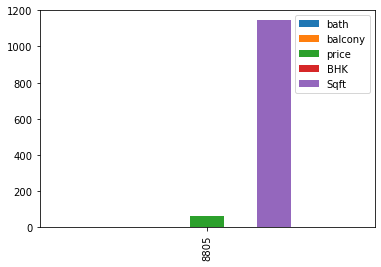

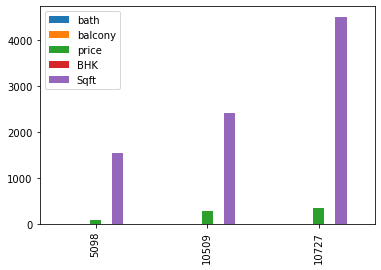

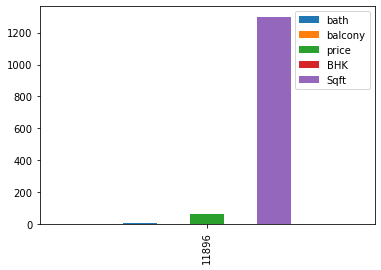

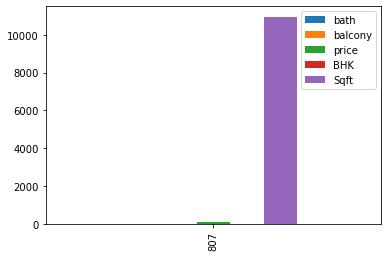

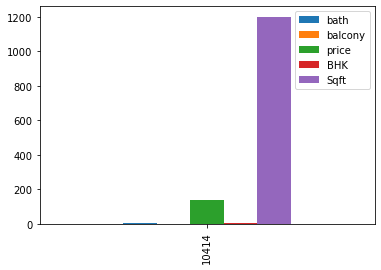

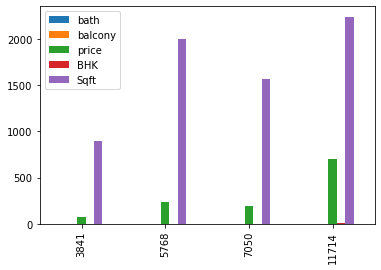

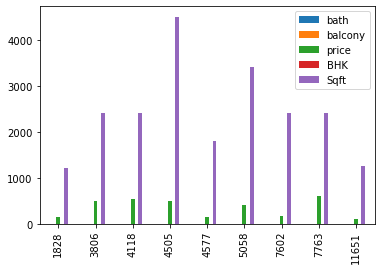

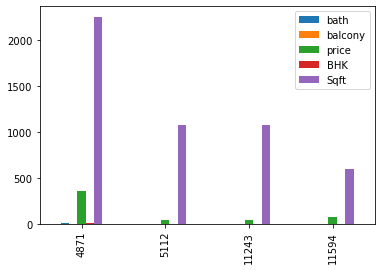

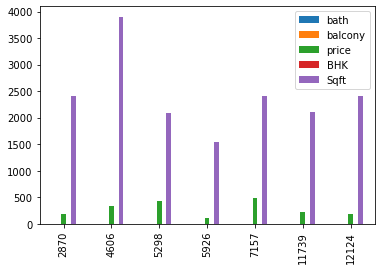

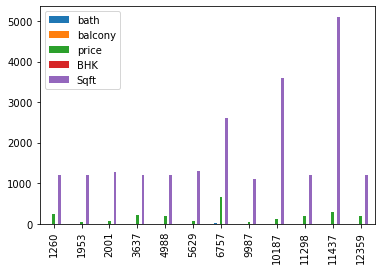

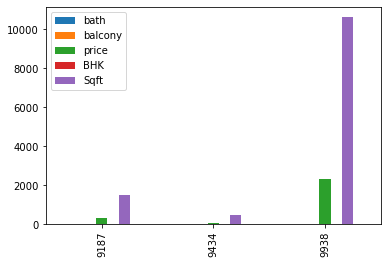

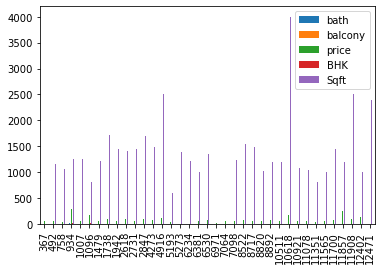

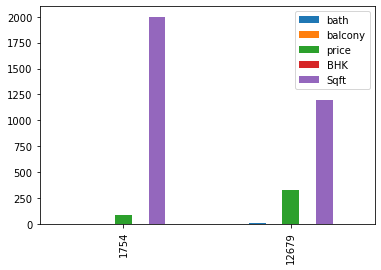

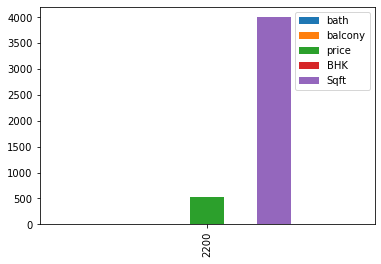

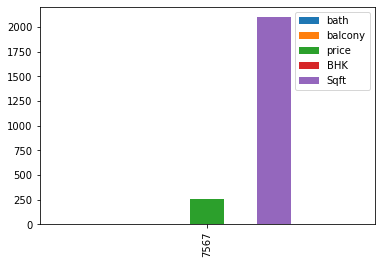

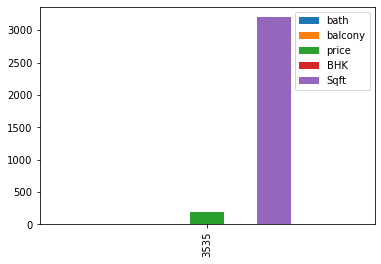

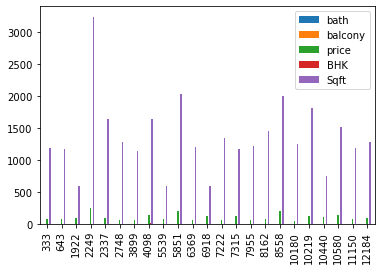

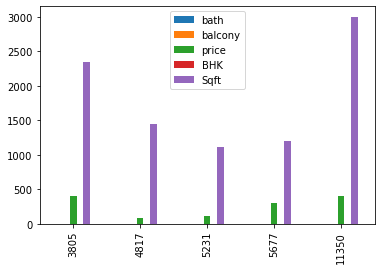

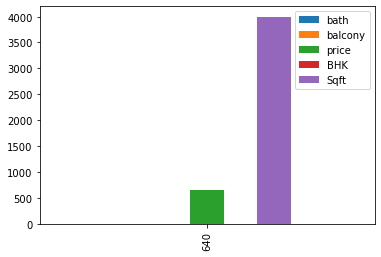

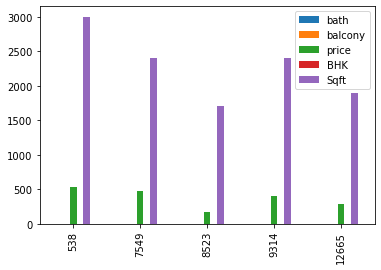

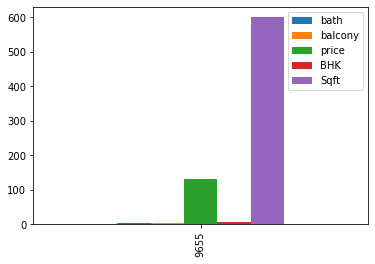

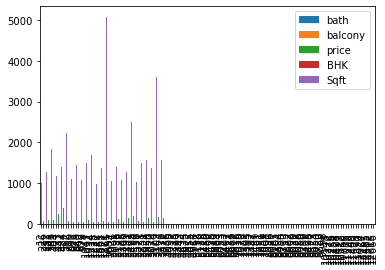

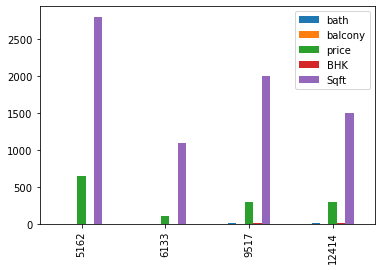

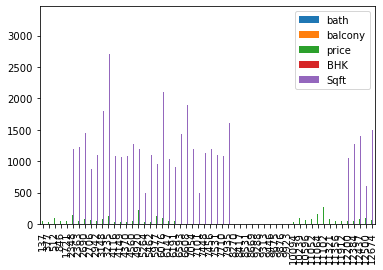

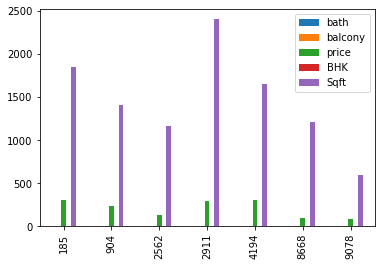

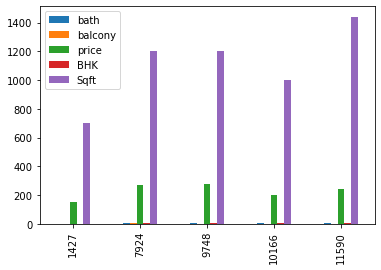

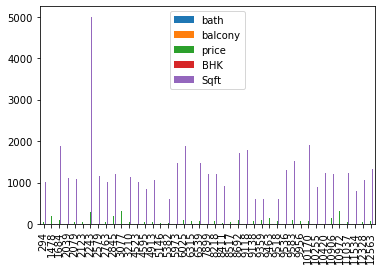

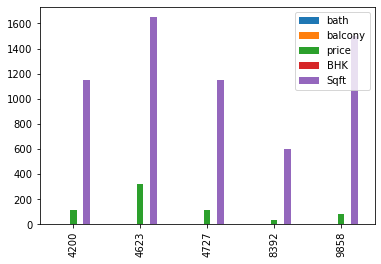

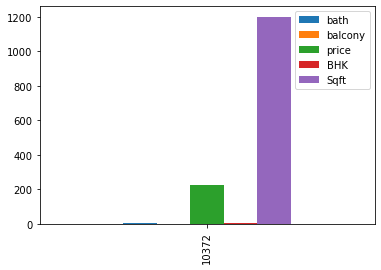

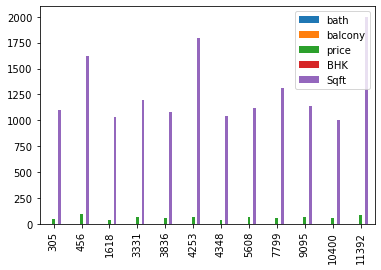

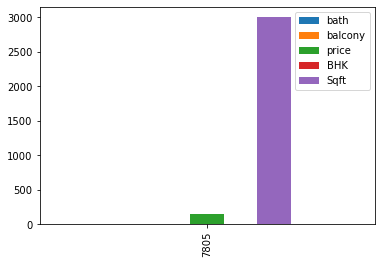

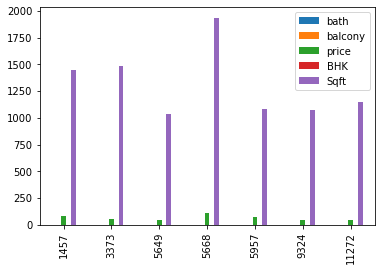

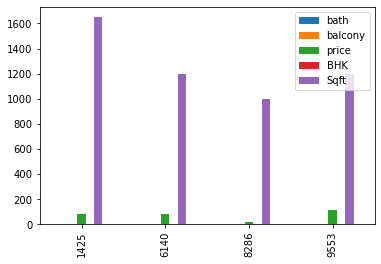

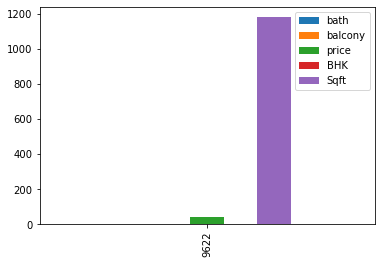

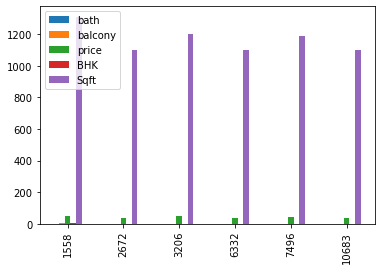

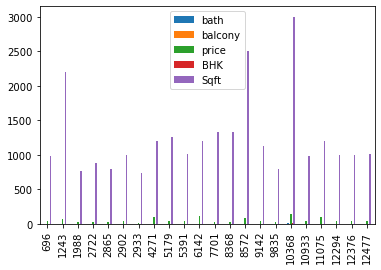

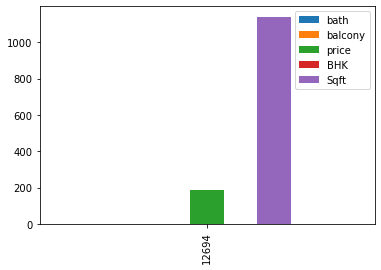

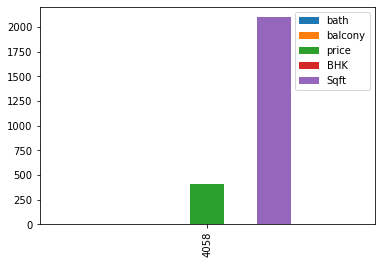

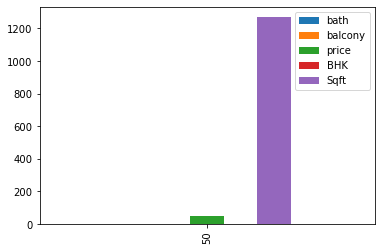

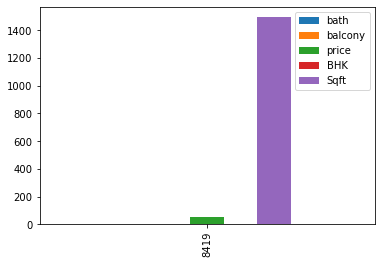

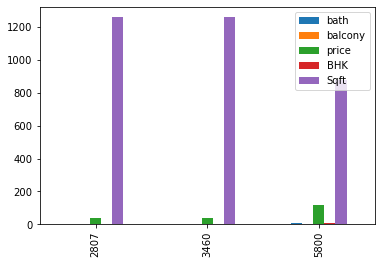

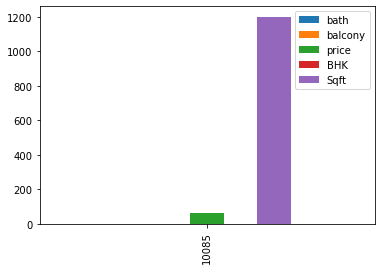

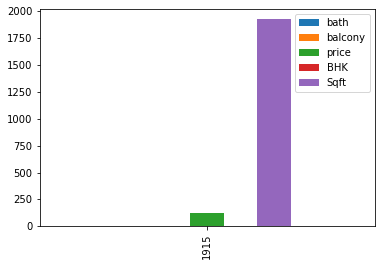

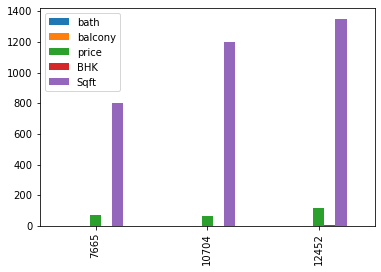

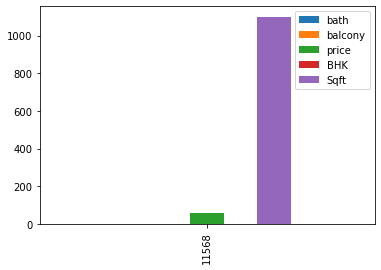

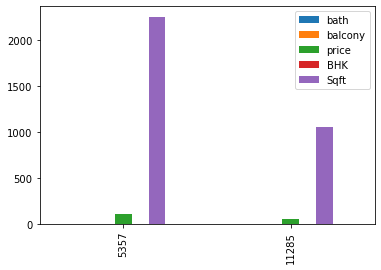

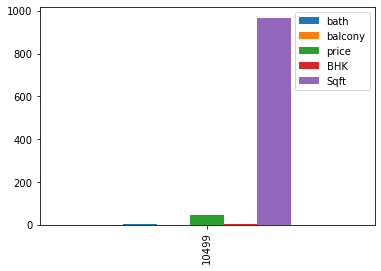

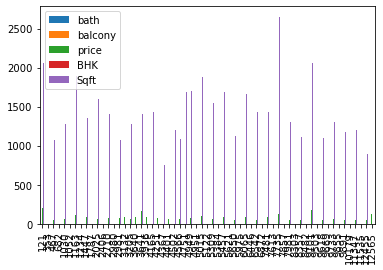

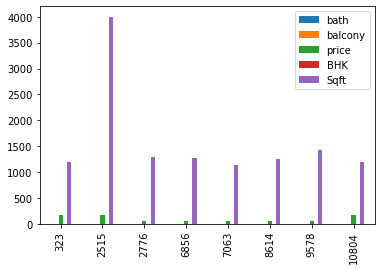

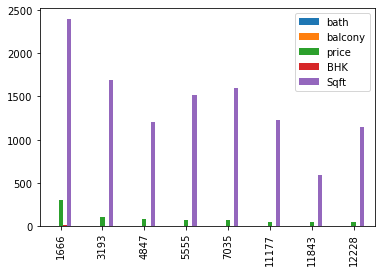

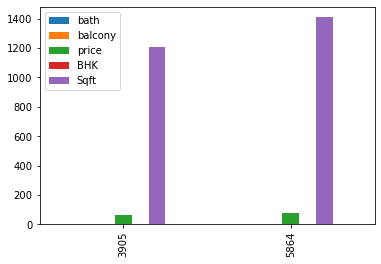

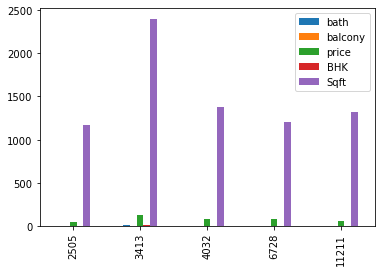

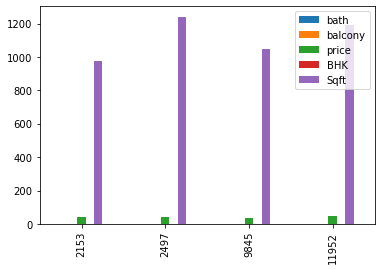

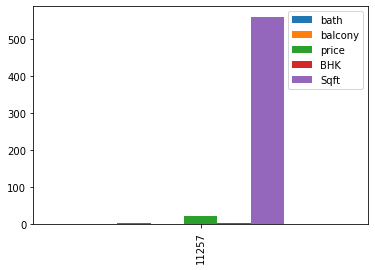

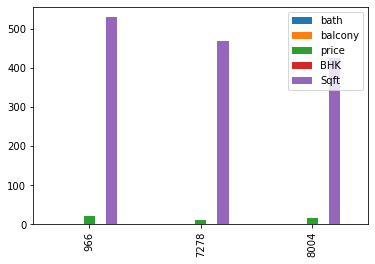

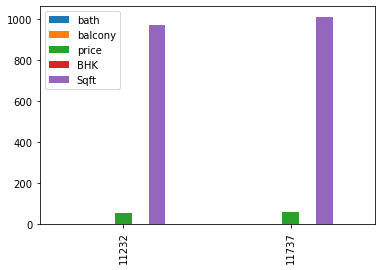

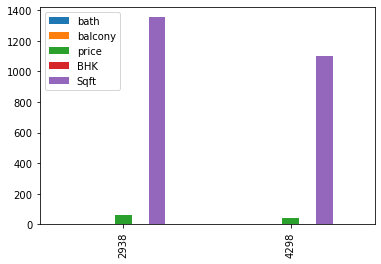

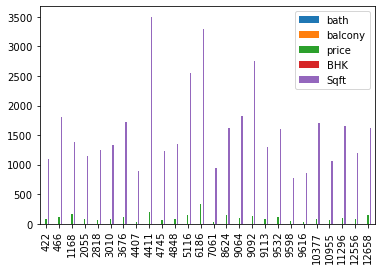

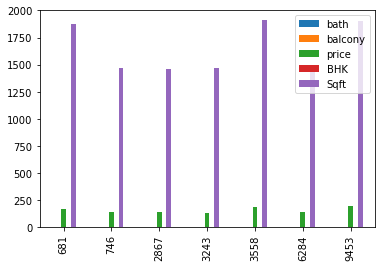

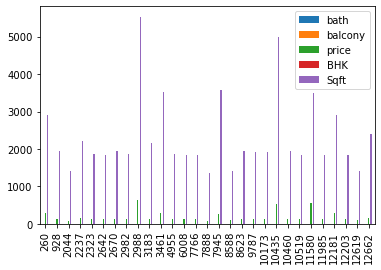

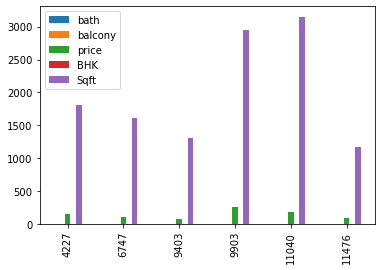

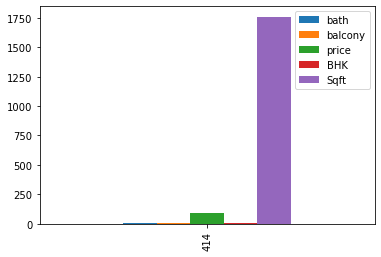

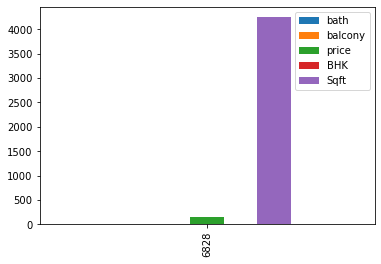

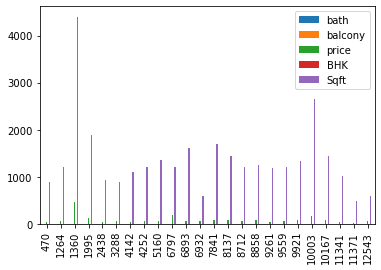

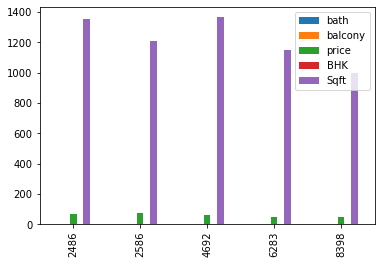

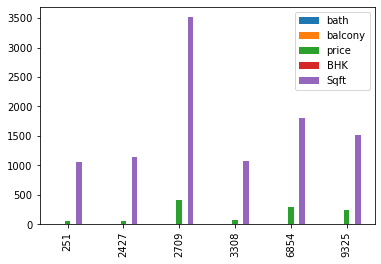

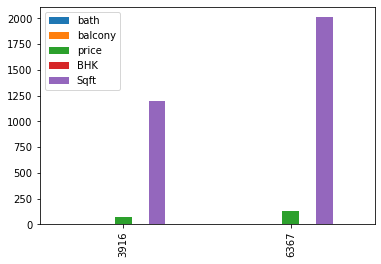

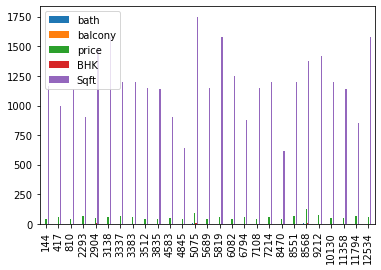

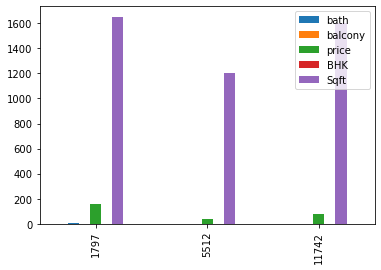

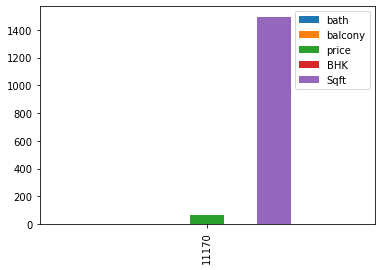

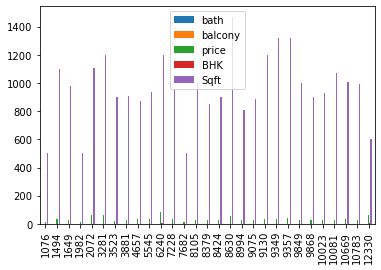

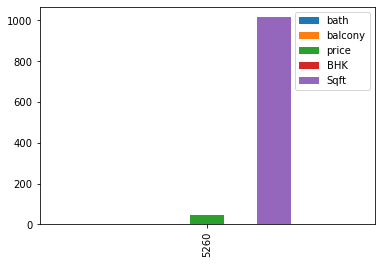

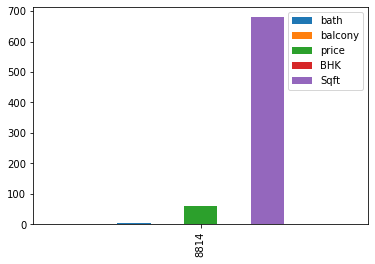

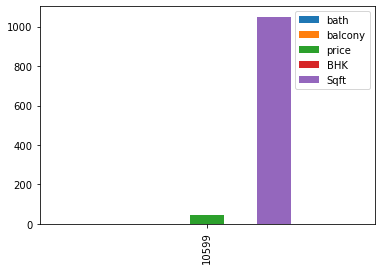

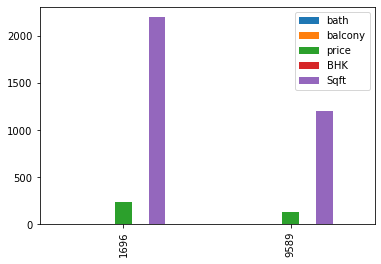

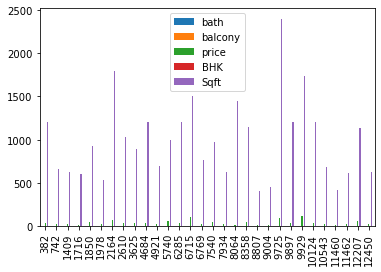

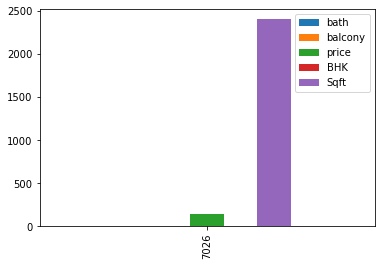

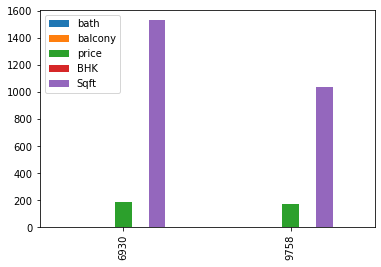

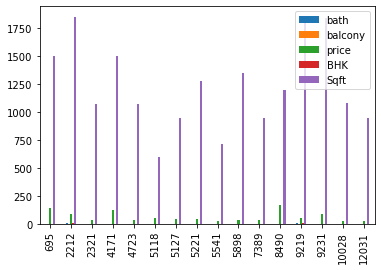

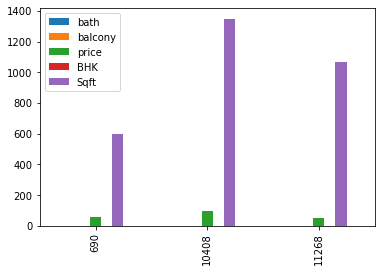

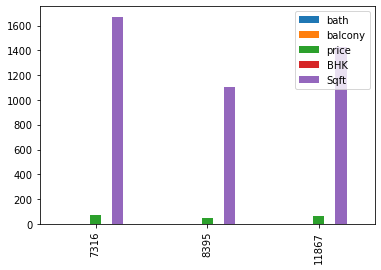

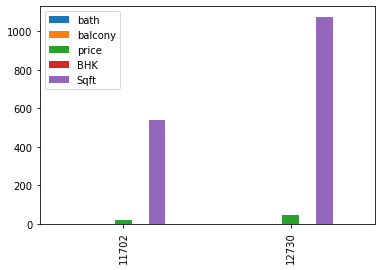

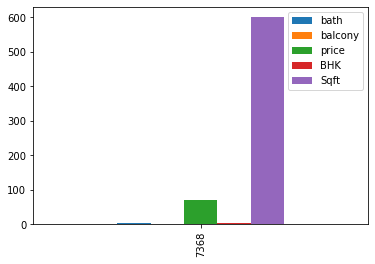

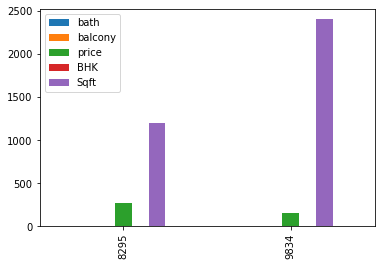

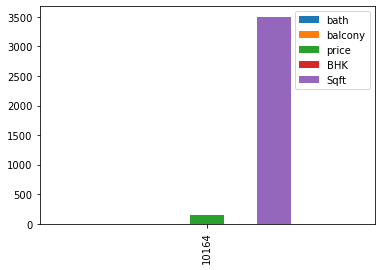

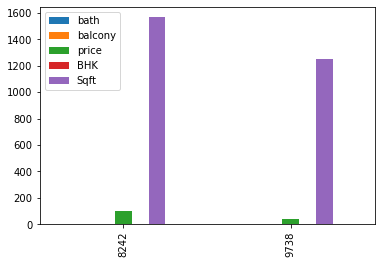

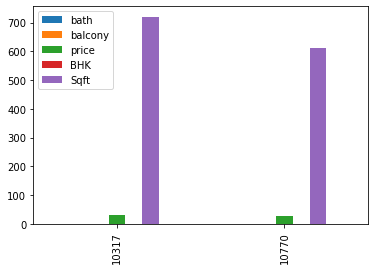

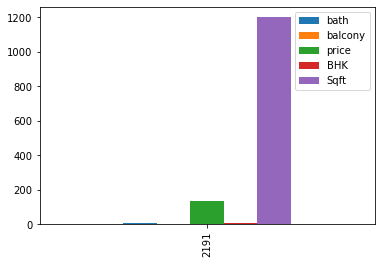

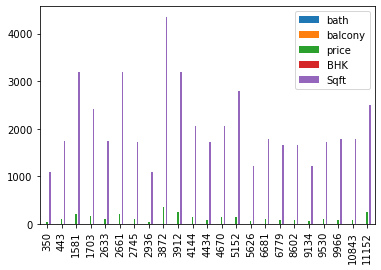

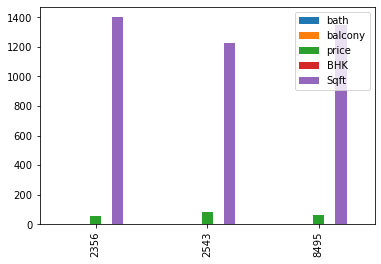

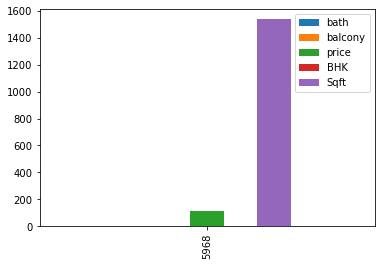

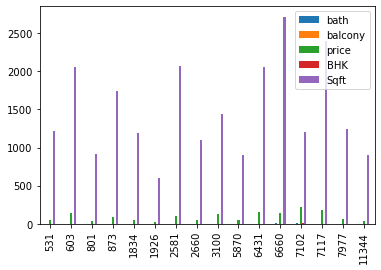

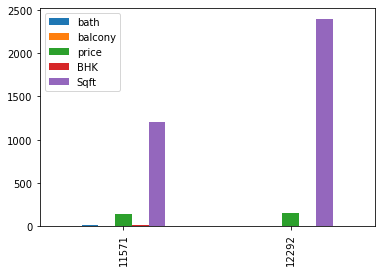

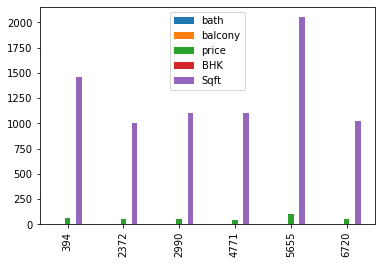

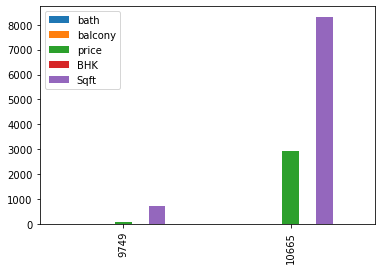

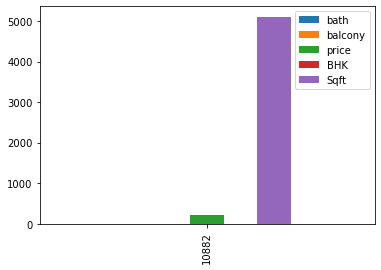

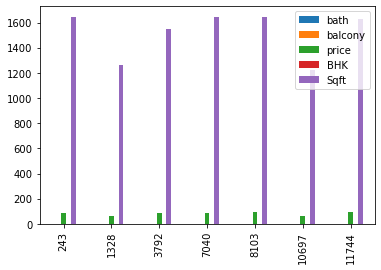

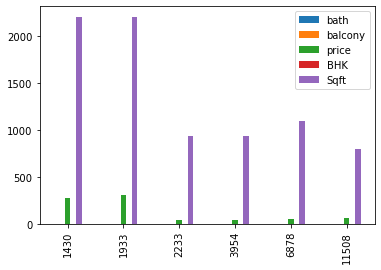

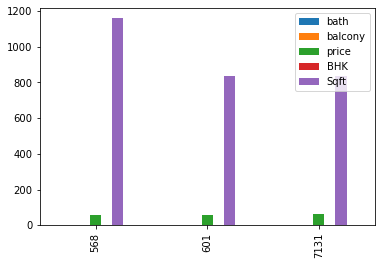

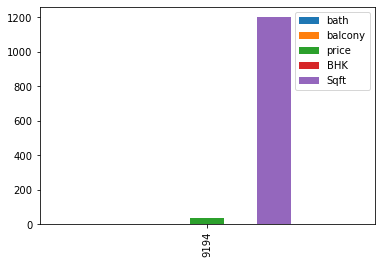

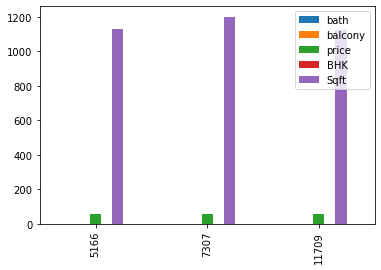

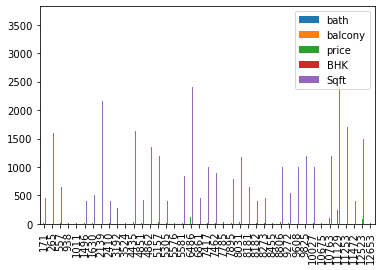

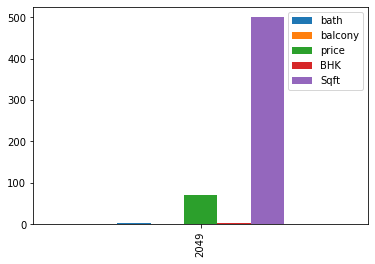

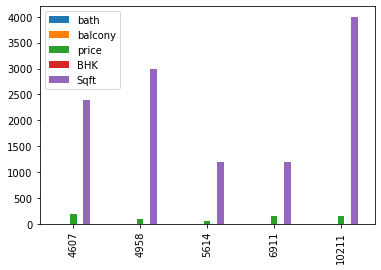

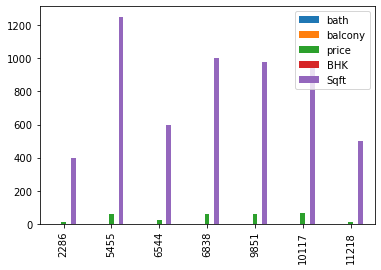

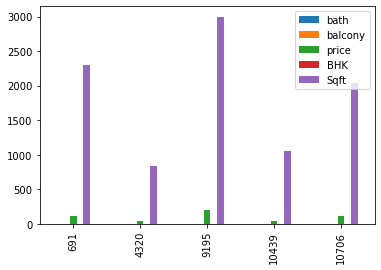

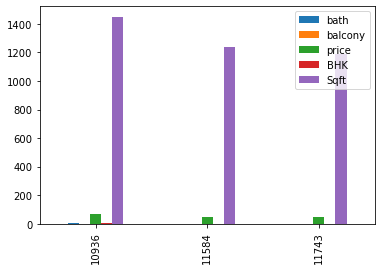

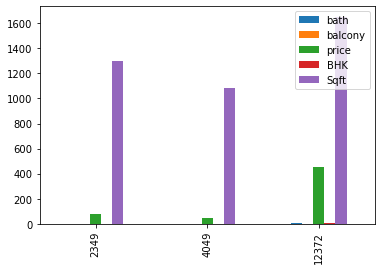

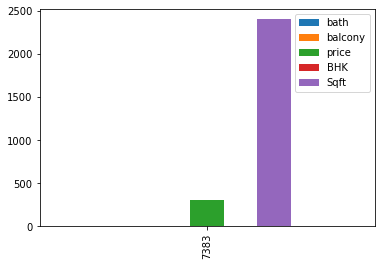

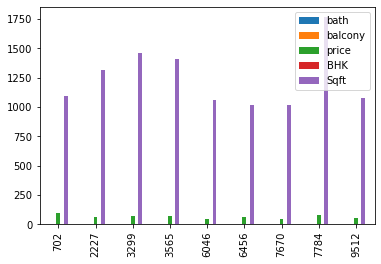

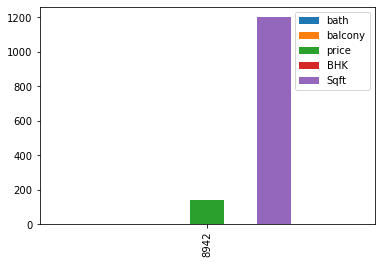

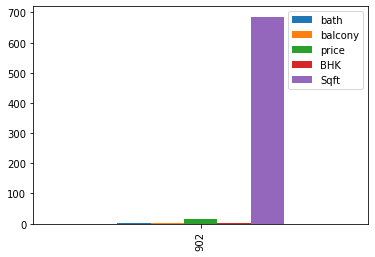

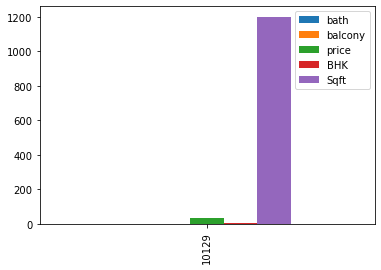

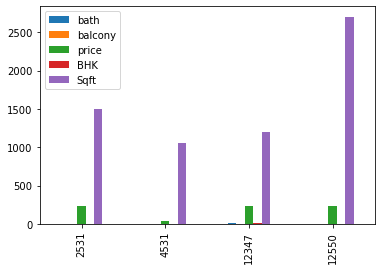

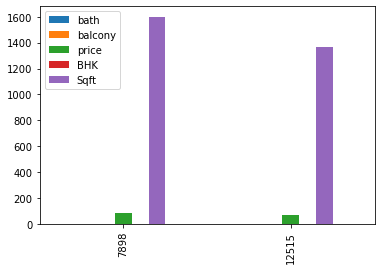

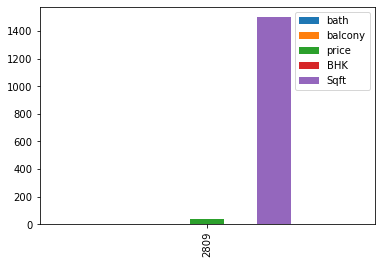

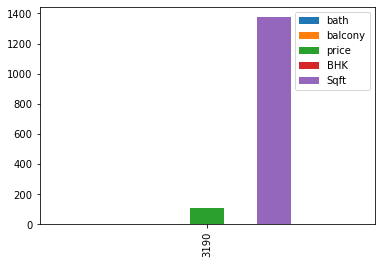

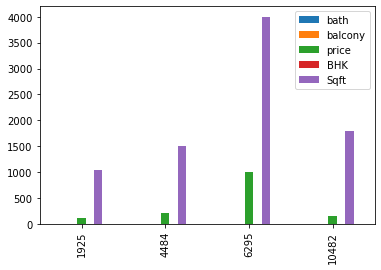

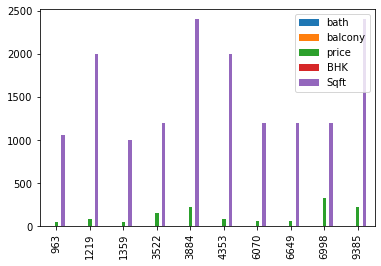

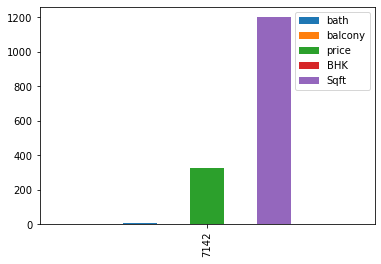

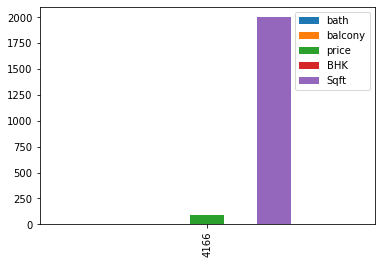

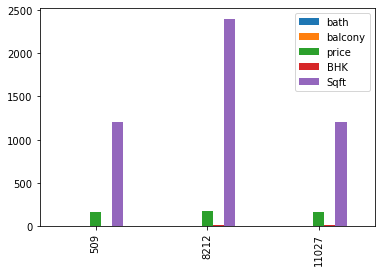

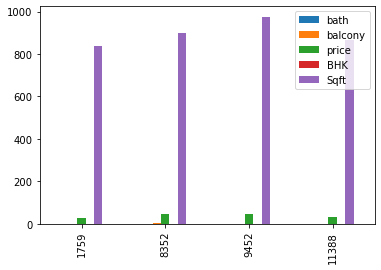

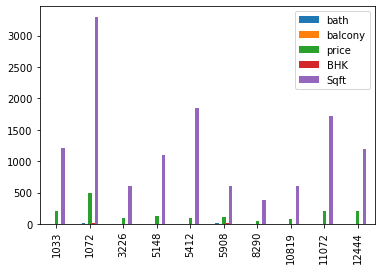

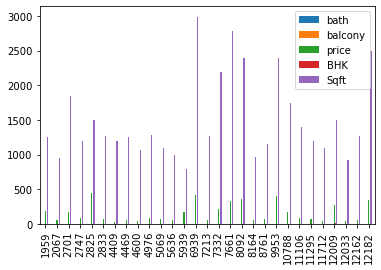

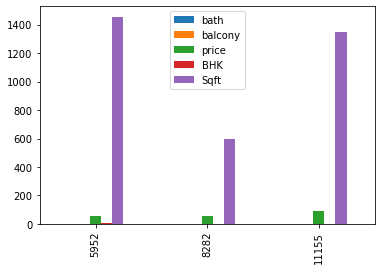

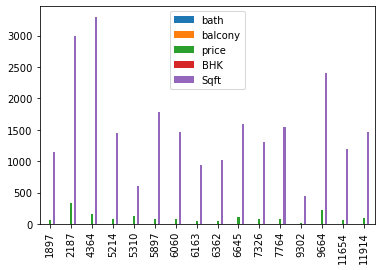

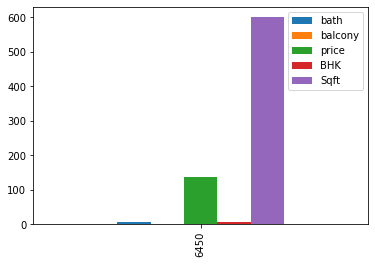

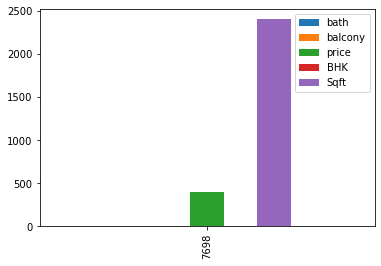

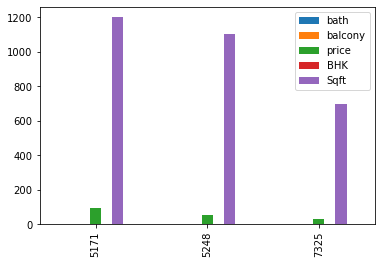

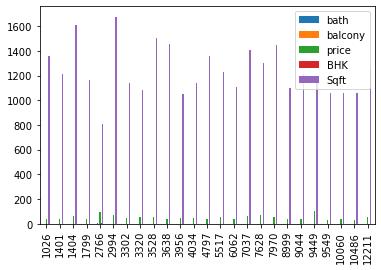

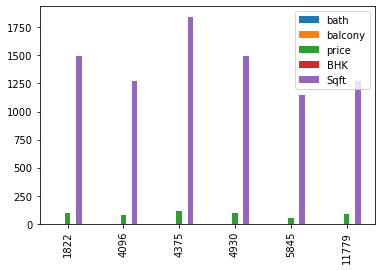

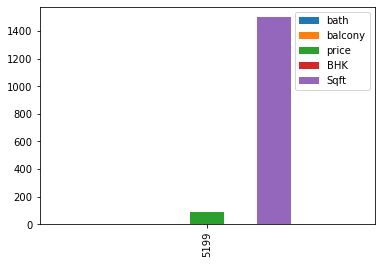

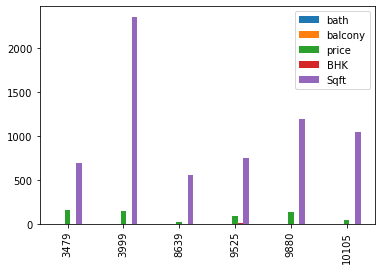

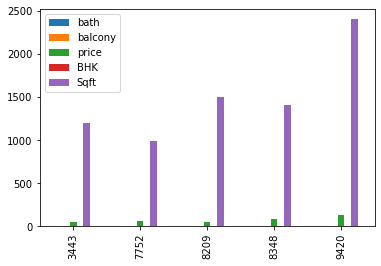

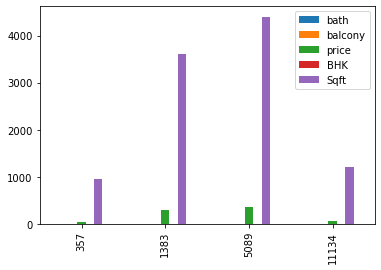

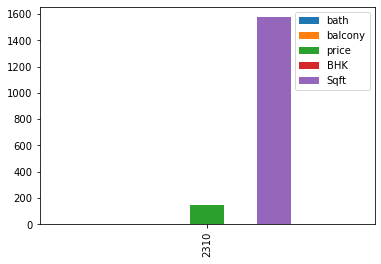

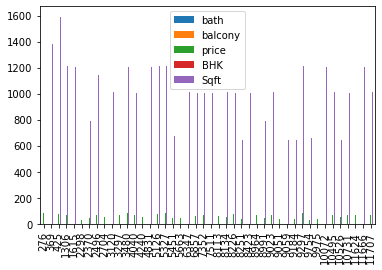

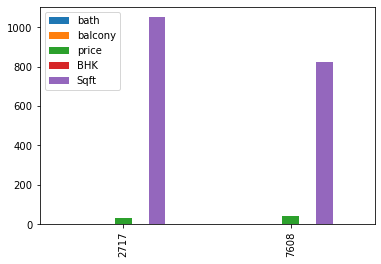

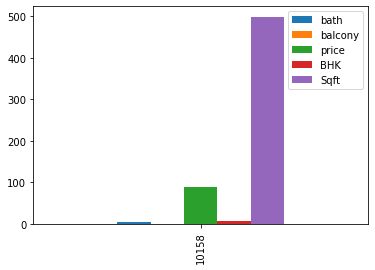

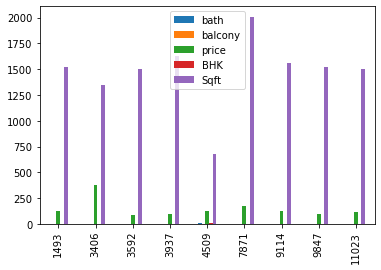

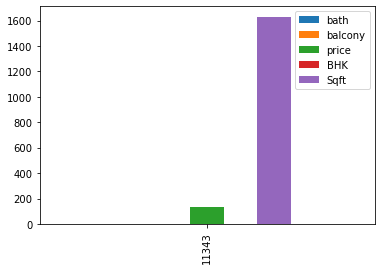

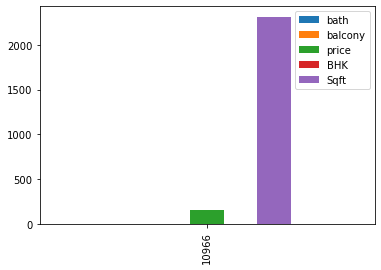

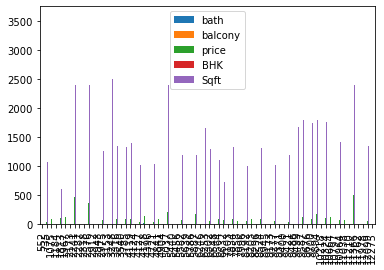

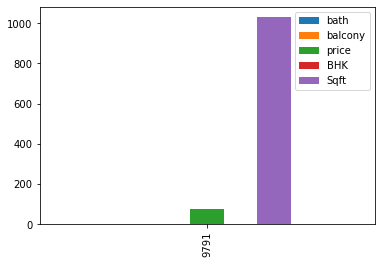

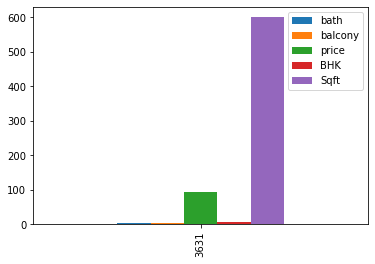

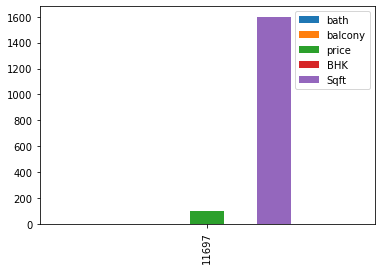

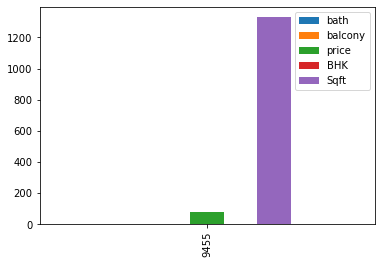

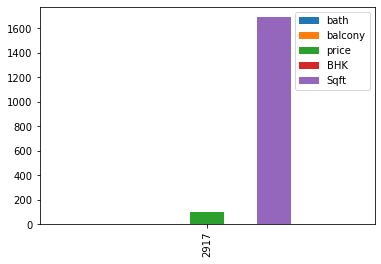

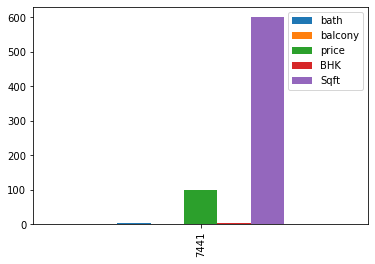

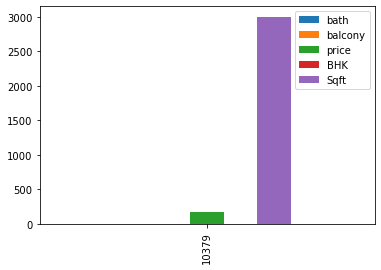

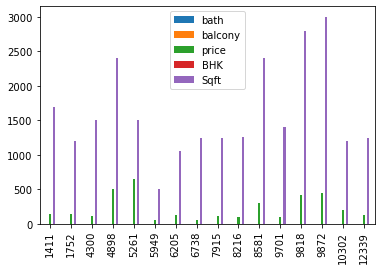

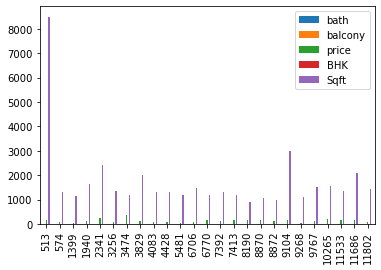

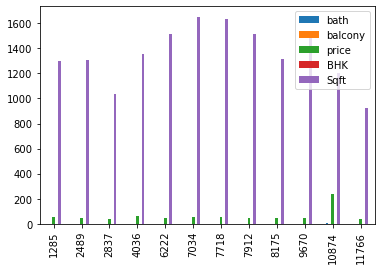

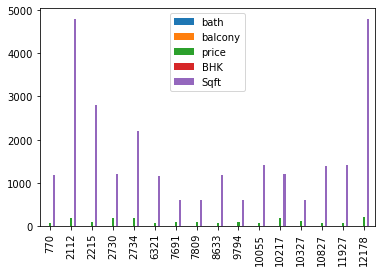

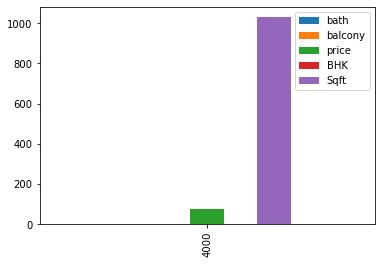

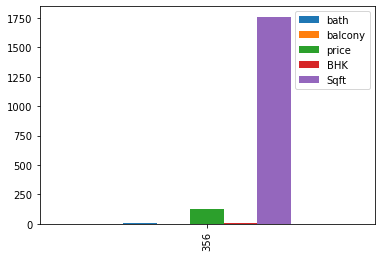

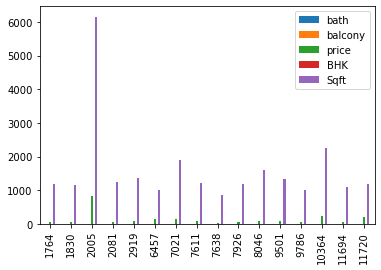

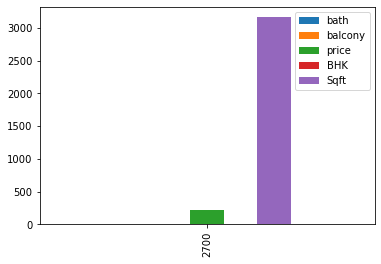

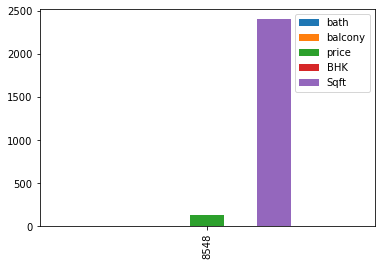

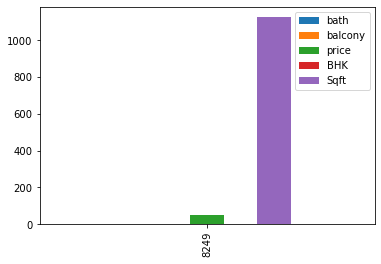

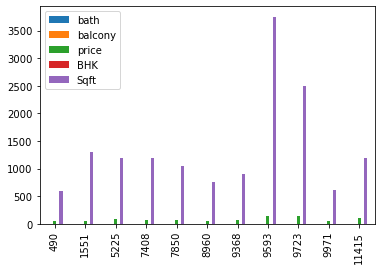

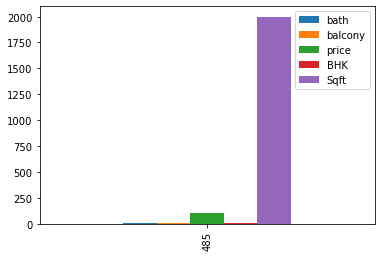

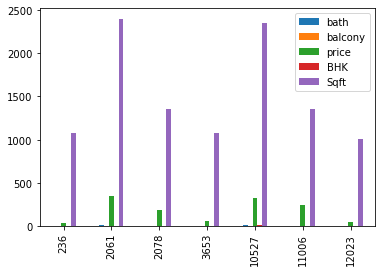

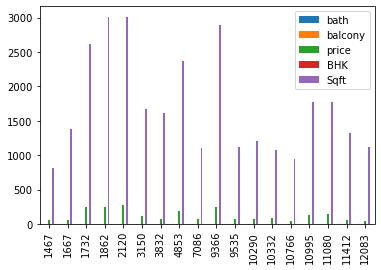

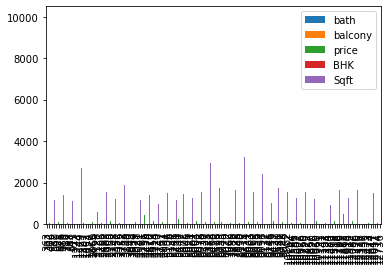

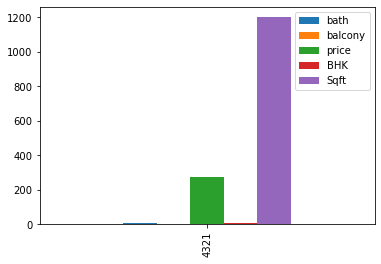

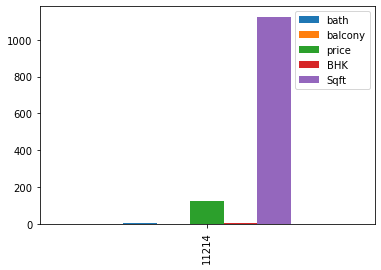

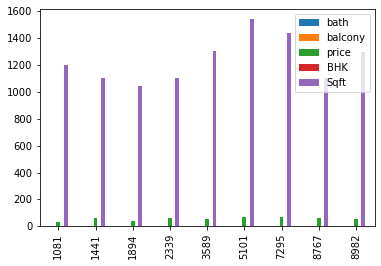

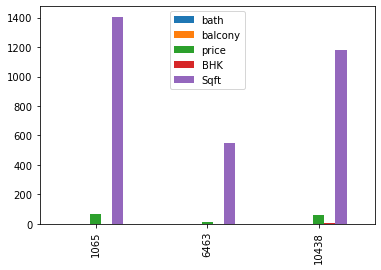

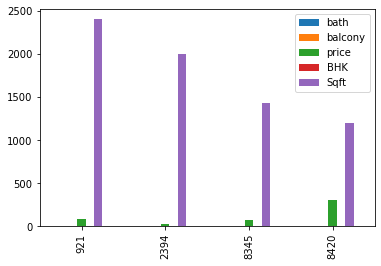

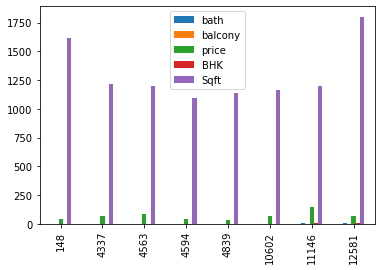

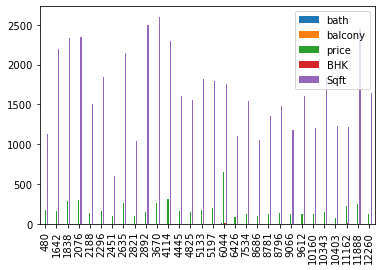

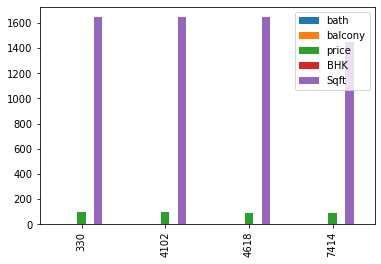

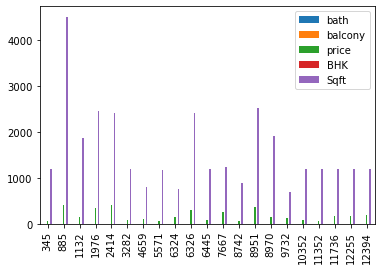

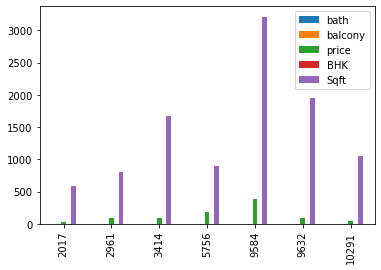

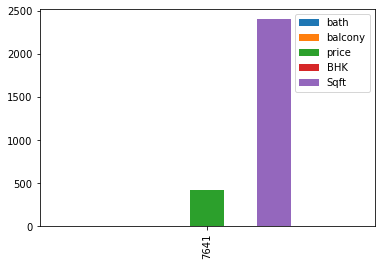

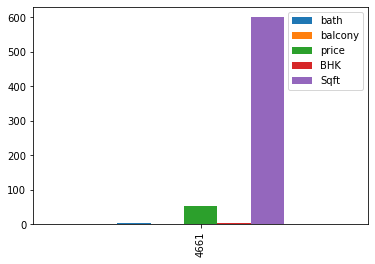

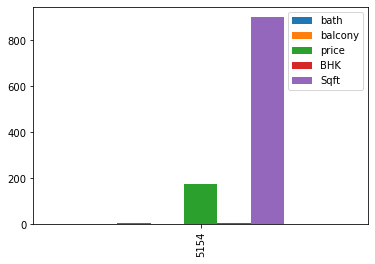

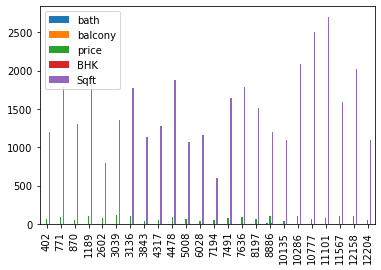

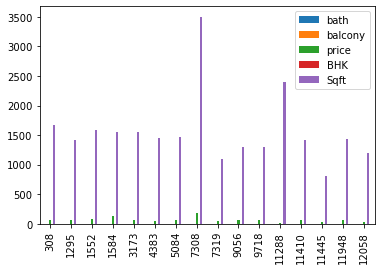

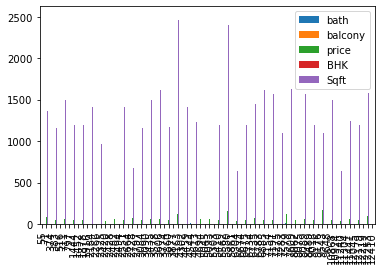

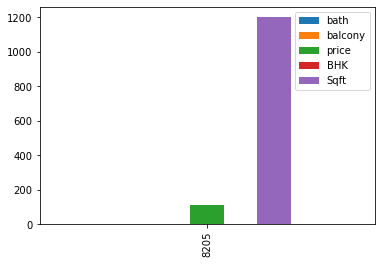

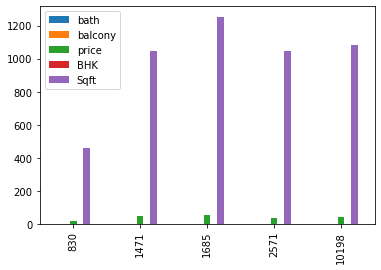

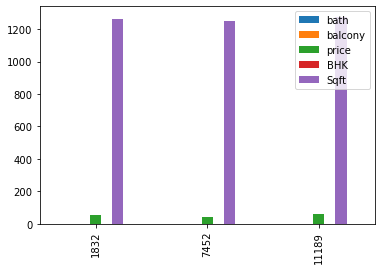

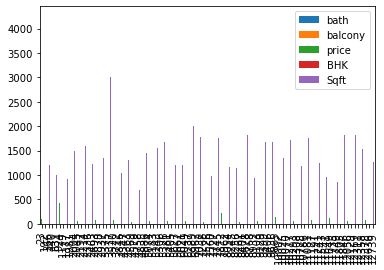

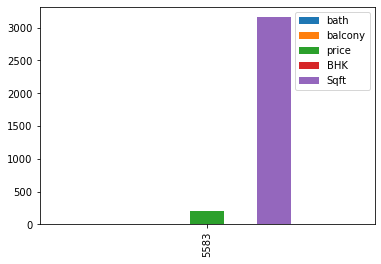

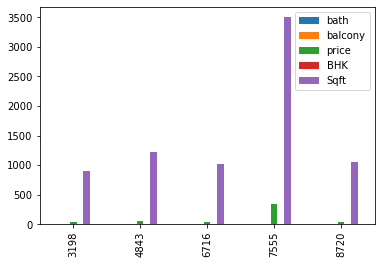

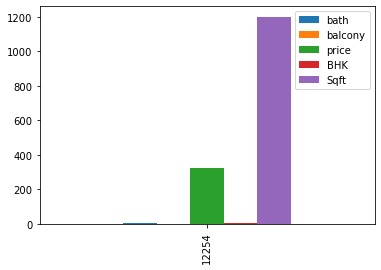

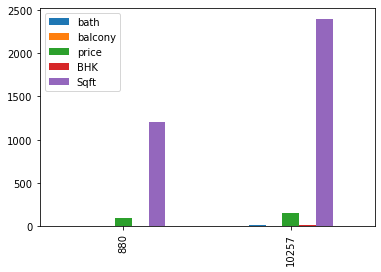

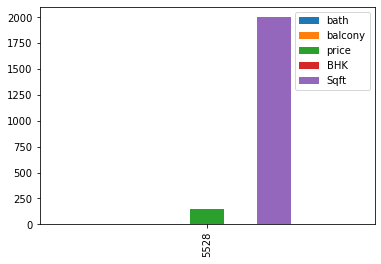

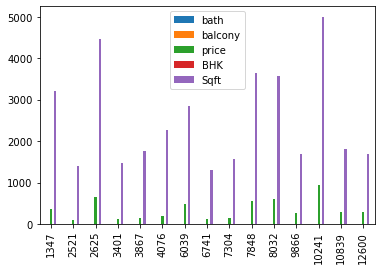

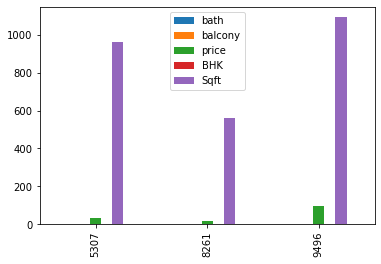

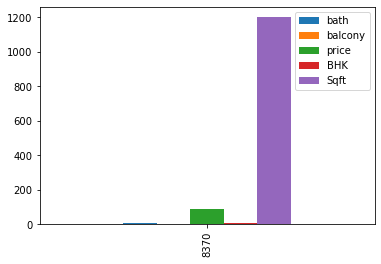

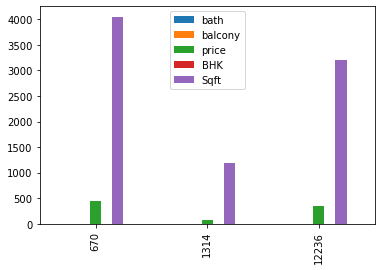

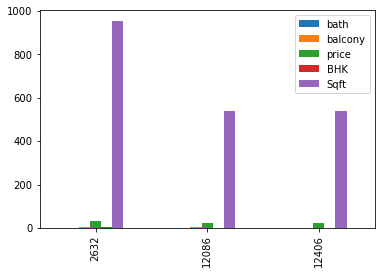

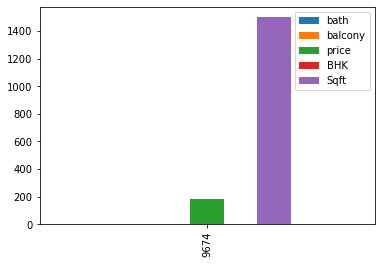

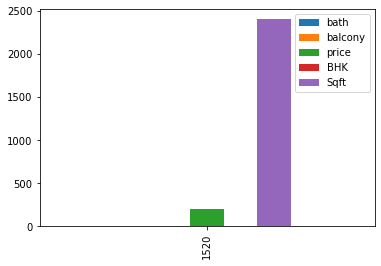

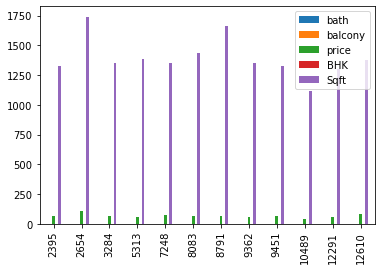

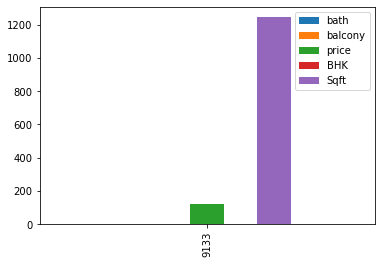

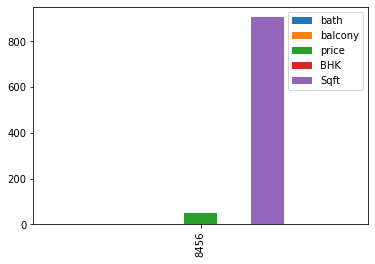

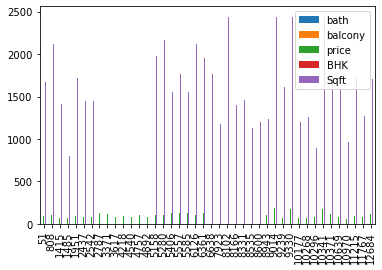

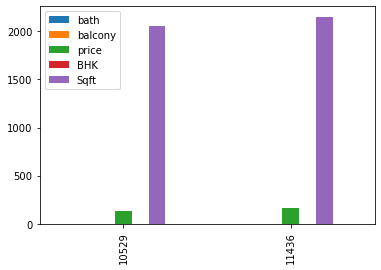

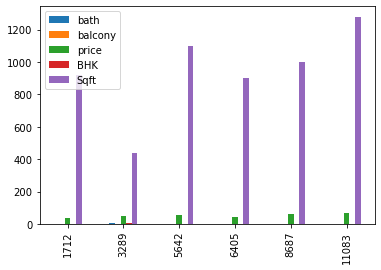

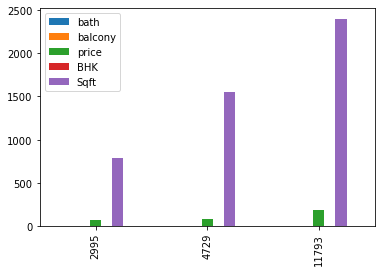

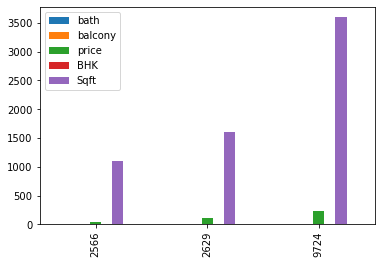

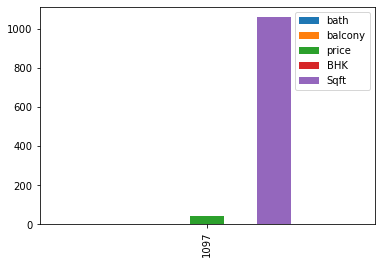

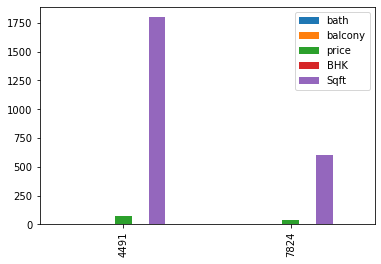

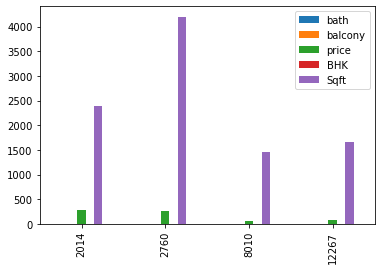

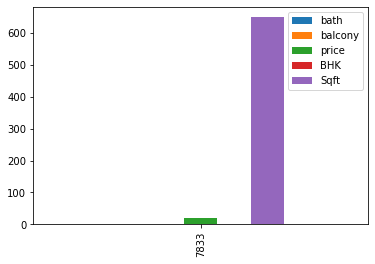

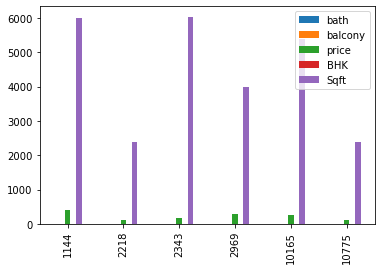

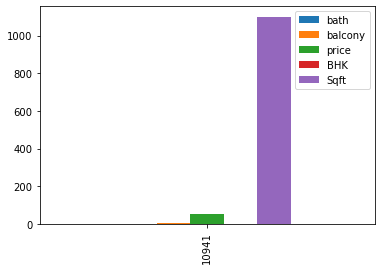

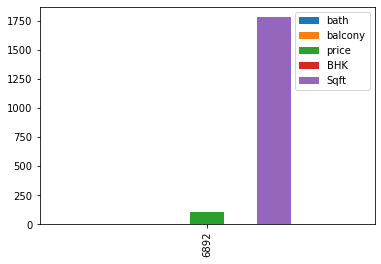

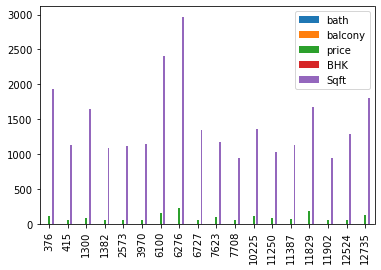

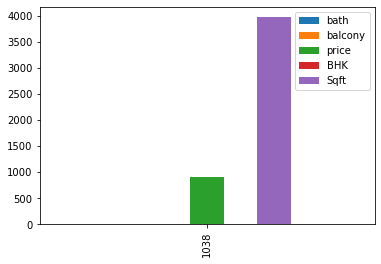

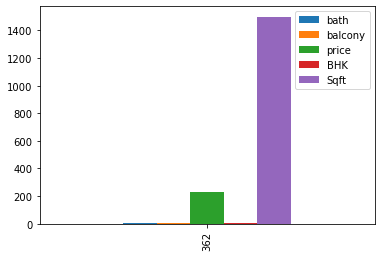

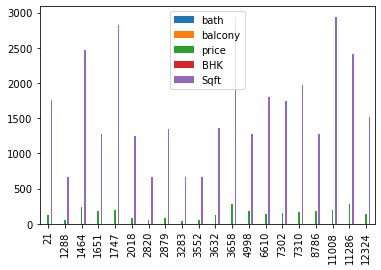

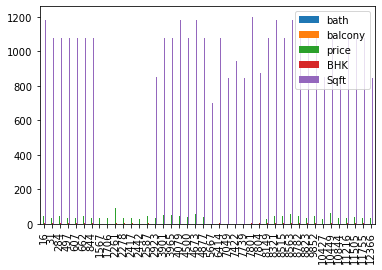

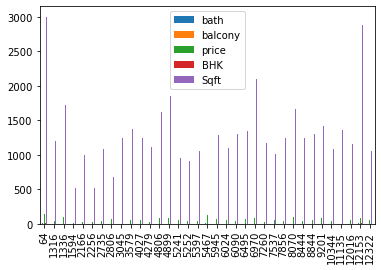

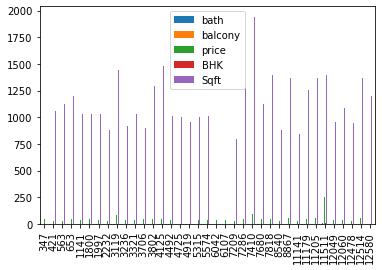

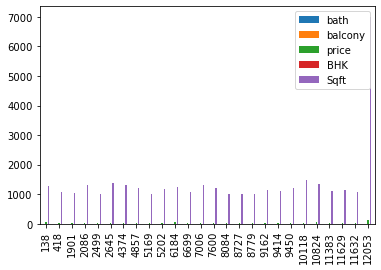

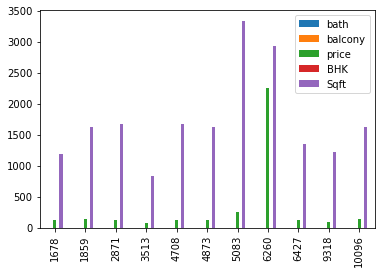

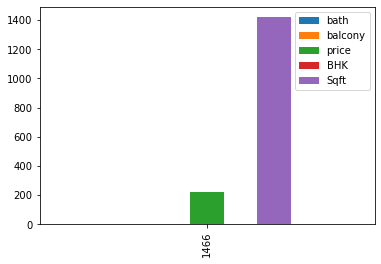

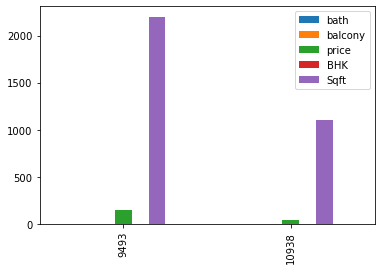

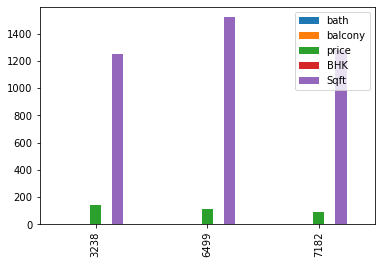

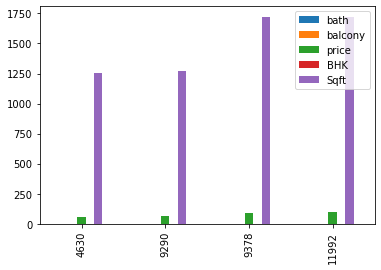

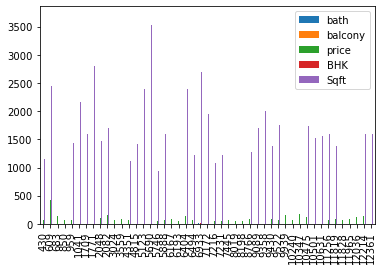

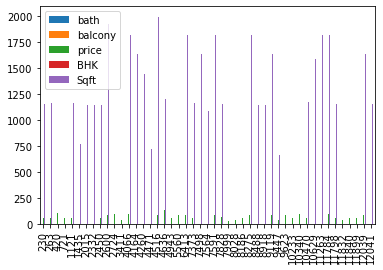

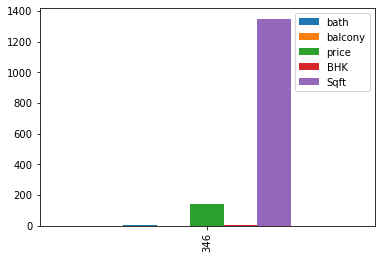

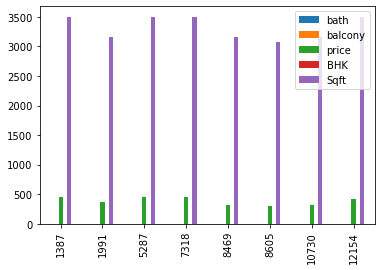

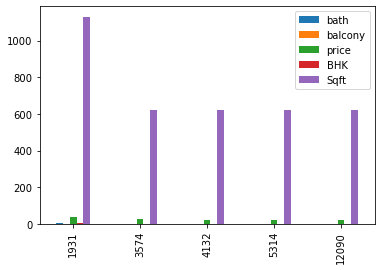

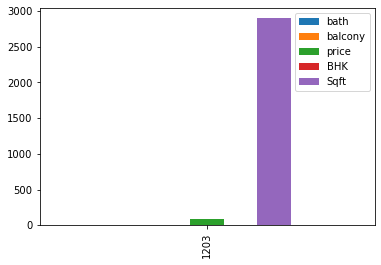

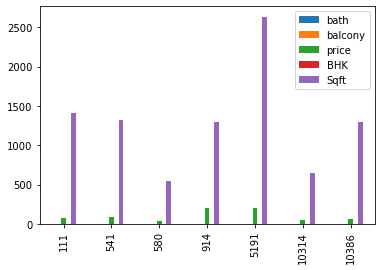

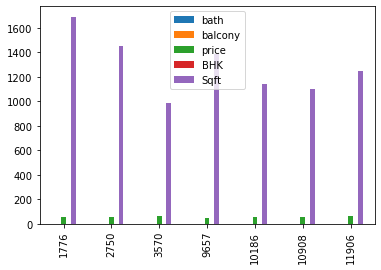

Error in callback <function flush_figures at 0x000002408C440F70> (for post_execute):


KeyboardInterrupt: 

In [26]:
df_tr.groupby('location').plot(kind = 'bar')

<AxesSubplot:xlabel='location'>

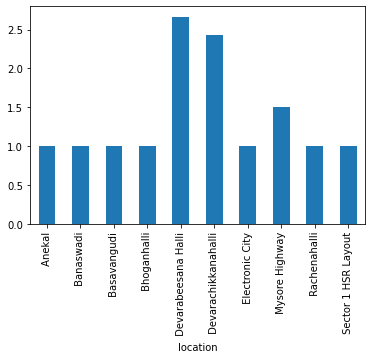

In [27]:
df_tr.groupby('location').BHK.mean().head(10).plot(kind = 'bar')

<AxesSubplot:xlabel='Sqft'>

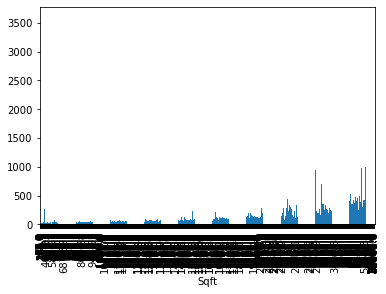

In [28]:
df_tr.groupby('Sqft').price.mean().plot(kind = 'bar')

In [29]:
sq = df_tr['Sqft'].value_counts(sort = True, ascending = True).head(10)
sq

2162.03    1
3905.00    1
4482.00    1
2270.00    1
4046.00    1
1542.14    1
1609.00    1
2120.00    1
7400.00    1
499.00     1
Name: Sqft, dtype: int64

<AxesSubplot:xlabel='location'>

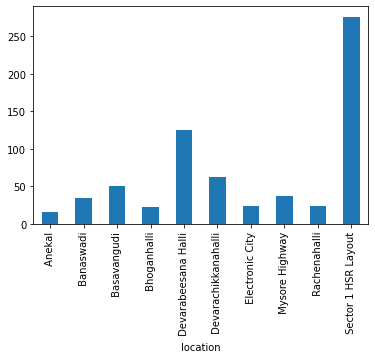

In [30]:
df_tr.groupby('location').price.mean().head(10).plot(kind = 'bar')

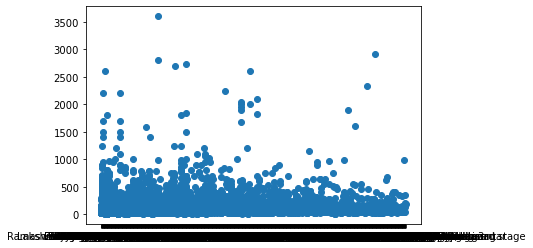

In [31]:
plt.scatter(df_tr['location'], df_tr['price'])

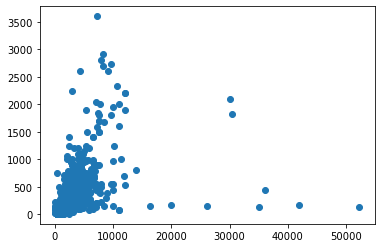

In [32]:
plt.scatter(df_tr['Sqft'], df_tr['price'])

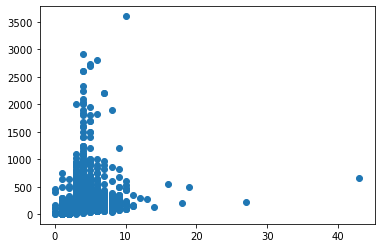

In [33]:
plt.scatter(df_tr['BHK'], df_tr['price'])

<AxesSubplot:>

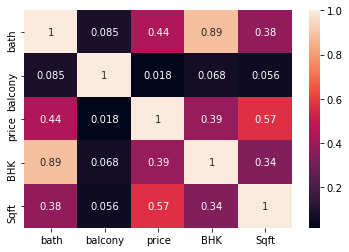

In [34]:
sns.heatmap(df_tr.corr(), annot = True)

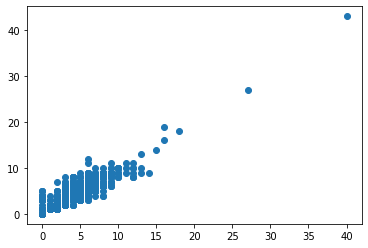

In [35]:
plt.scatter(df_tr['bath'], df_tr['BHK'])

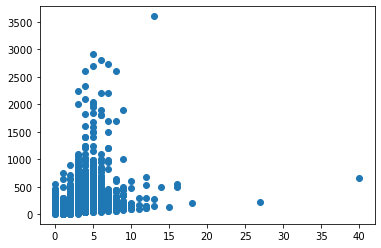

In [36]:
plt.scatter(df_tr['bath'], df_tr['price'])

In [37]:
df_tr['location'].nunique()

1300

In [38]:
cat = df_tr.select_dtypes(exclude = np.number)
cat[0:2]

,location,society
0,Electronic City Phase II,Coomee
1,Chikka Tirupathi,Theanmp


In [39]:
cat1 = df_tr['location'].astype('category').cat.codes

In [40]:
cat2 = df_tr['society'].astype('category').cat.codes

In [41]:
num = df_tr.select_dtypes(include = np.number)
num.head()

,bath,balcony,price,BHK,Sqft
0,2.0,1.0,39.07,2,1056.0
1,5.0,3.0,120.00,4,2600.0
2,2.0,3.0,62.00,3,1440.0
3,3.0,1.0,95.00,3,1521.0
4,2.0,1.0,51.00,2,1200.0


In [42]:
num1 = pd.DataFrame(num)
num1[0:2]

,bath,balcony,price,BHK,Sqft
0,2.0,1.0,39.07,2,1056.0
1,5.0,3.0,120.00,4,2600.0


In [43]:
pre_tr = pd.concat([cat1,cat2, df_tr[['bath', 'balcony', 'BHK', 'Sqft', 'price']]], axis = 1)

In [44]:
pre_tr[0:2]

,0,1,bath,balcony,BHK,Sqft,price
0,416,462,2.0,1.0,2,1056.0,39.07
1,314,2437,5.0,3.0,4,2600.0,120.00


In [45]:
pre_tr.rename(columns = {0: 'location', 1: 'society'})

,location,society,bath,balcony,BHK,Sqft,price
0,416,462,2.0,1.0,2,1056.0,39.07
1,314,2437,5.0,3.0,4,2600.0,120.00
2,1175,2490,2.0,3.0,3,1440.0,62.00
3,754,2184,3.0,1.0,3,1521.0,95.00
4,713,2490,2.0,1.0,2,1200.0,51.00
...,...,...,...,...,...,...,...
12740,471,2224,3.0,3.0,3,1715.0,112.00
12741,1248,208,4.0,0.0,5,3453.0,231.00
12742,999,2490,5.0,0.0,4,3600.0,400.00
12743,967,1214,2.0,1.0,2,1141.0,60.00


In [46]:
x = pre_tr.drop(columns = ['price'])
y = pre_tr['price']

In [47]:
pre_tr['price'].value_counts()

75.00    298
65.00    296
55.00    265
60.00    263
45.00    230
        ... 
48.42      1
86.51      1
94.99      1
74.52      1
58.30      1
Name: price, Length: 1991, dtype: int64

In [48]:
model = LinearRegression()

In [49]:
model.fit(x, y)

LinearRegression()

In [50]:
y_pred = model.predict(x)

In [51]:
df_te = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\Data machine hack\Data\test.csv")
df_te[0:2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN


In [52]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [53]:
df_te.duplicated().sum()

33

In [54]:
df_te.isna().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [55]:
df_te['size'].fillna('0', inplace = True)
df_te['society'].fillna('Unknown', inplace = True)
df_te['bath'].fillna(0.0, inplace = True)
df_te['balcony'].fillna(0.0, inplace = True)
df_te['price'].fillna(0.0, inplace = True)

In [56]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1480 non-null   object 
 4   society       1480 non-null   object 
 5   total_sqft    1480 non-null   object 
 6   bath          1480 non-null   float64
 7   balcony       1480 non-null   float64
 8   price         1480 non-null   float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [57]:
df_te['BHK'] = df_te['size'].astype('str').apply(fn)

In [58]:
df_te['Sqft'] = df_te['total_sqft'].apply(fn2)

In [59]:
df_te.drop(columns = ['area_type', 'availability', 'size'], inplace = True)

In [60]:
df_te['Sqft'].fillna(0.0, inplace = True)

In [61]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1480 non-null   object 
 1   society     1480 non-null   object 
 2   total_sqft  1480 non-null   object 
 3   bath        1480 non-null   float64
 4   balcony     1480 non-null   float64
 5   price       1480 non-null   float64
 6   BHK         1480 non-null   int64  
 7   Sqft        1480 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 92.6+ KB


In [62]:
cat3 = df_te['location'].astype('category').cat.codes
cat4 = df_te['society'].astype('category').cat.codes

In [63]:
pre_te = pd.concat([cat3,cat4, df_te[['bath', 'balcony', 'BHK', 'Sqft', 'price']]], axis = 1)
pre_te[0:2]

,0,1,bath,balcony,BHK,Sqft,price
0,95,404,2.0,2.0,2,1225.0,0.0
1,30,560,9.0,2.0,9,2400.0,0.0


In [64]:
pre_te.rename(columns = {0: 'location', 1: 'society'})

,location,society,bath,balcony,BHK,Sqft,price
0,95,404,2.0,2.0,2,1225.0,0.0
1,30,560,9.0,2.0,9,2400.0,0.0
2,185,441,5.0,2.0,4,1650.0,0.0
3,269,590,3.0,1.0,3,1322.0,0.0
4,274,26,2.0,1.0,2,1161.0,0.0
...,...,...,...,...,...,...,...
1475,469,346,2.0,1.0,2,1246.0,0.0
1476,164,560,3.0,2.0,3,1660.0,0.0
1477,107,563,2.0,2.0,2,1216.0,0.0
1478,448,448,2.0,1.0,2,996.0,0.0


In [65]:
X = pre_te.drop(columns = ['price'])

In [66]:
Y_pred = model.predict(X)

In [67]:
pre_te['price'] = Y_pred
df_te['price'] = Y_pred

In [68]:
df_te.to_csv('prediction11.csv', index = False)

In [69]:
mean_squared_error(y, y_pred)

13976.38484104746

In [70]:
1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y +1)).mean())

<ipython-input-70-a08b26e51929>:1: RuntimeWarning: invalid value encountered in log10
  1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y +1)).mean())


0.7808968583698748